In [45]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

## Loading Dataset from sklearn

In [46]:
#loading boston data 
from sklearn.datasets import load_boston
boston_data = load_boston()

In [47]:
print(boston_data.data)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [48]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


It shows boston_data has data containg features which in input training feature/labels, target having the output, DESCR for description of boston housing data,etc

## Describing the Dataset

In [49]:
#BOSTON HOUSING DATA DESCRIPTION
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [50]:
#SHAPE OF BOSTON DATA
boston_data.data.shape

(506, 13)

In [51]:
#Finding boston data feature names
feature_names = boston_data.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Setting up our dataset for Linear Regression

In [52]:
#Converting the boston data to dataframe
df = pd.DataFrame(boston_data.data)
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [53]:
#Adding Column Names to the df dataframe from feature_names we have found out
df.columns = feature_names
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [54]:
#Shape of df => It shows 506 rows and 13 columns
df.shape

(506, 13)

In [55]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [56]:
# Showing summary of each columns using describe()
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

There are 13 input training features,we will be needing the output target to be in dataframe df, so let us append the target from boston_data as "price" column

In [57]:
df['MEDV'] = boston_data.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [58]:
df.shape

(506, 14)

Now df.shape() shows there are 506 rows and 14 column in which 14th column "Price" is the target/output

In [59]:
# Showing summary of each columns using describe()
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [60]:
#Checking Missing Values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

It seems there are now missing values in any columns of dataframe

## DATA VISULAIZATION 

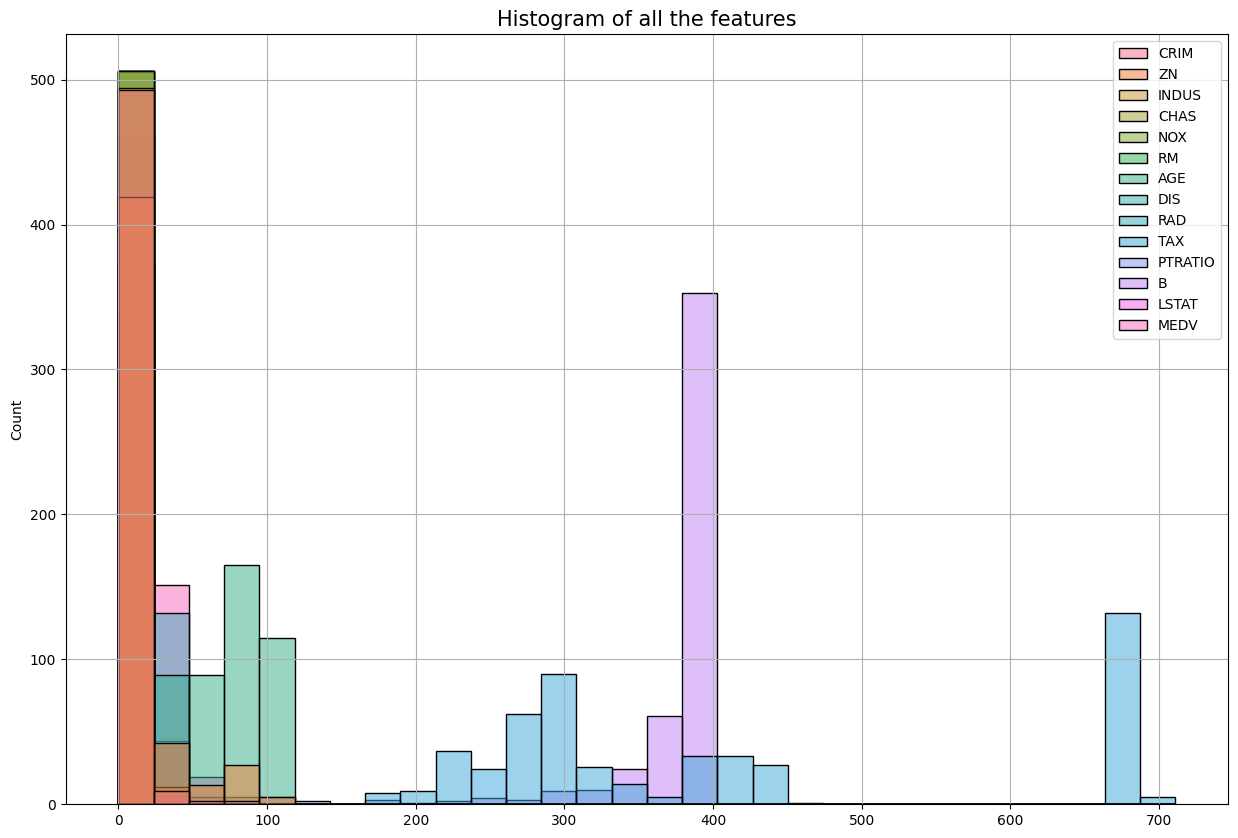

In [61]:
#HISTOGRAM 
plt.figure(figsize=(15,10))
sns.histplot(data=df,bins=30,)
plt.grid(True)
plt.title('Histogram of all the features', fontsize=15)
plt.show()

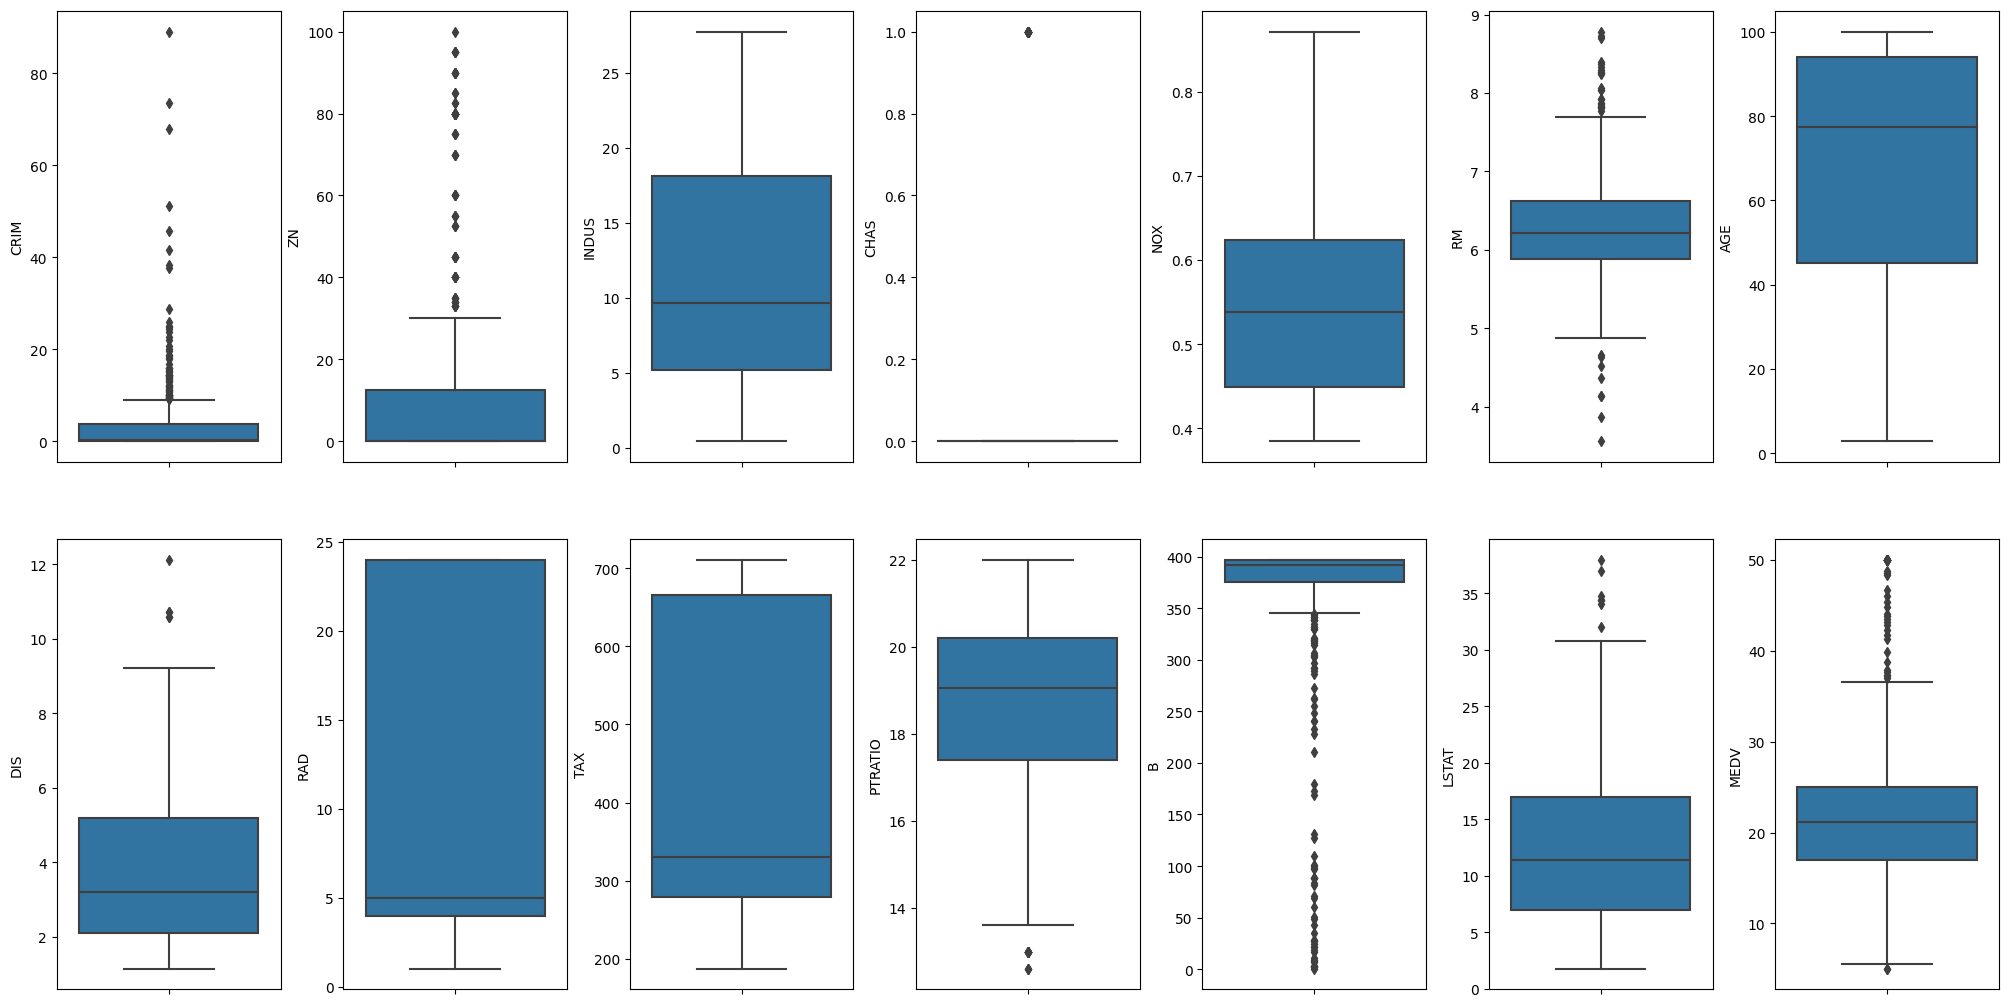

In [62]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

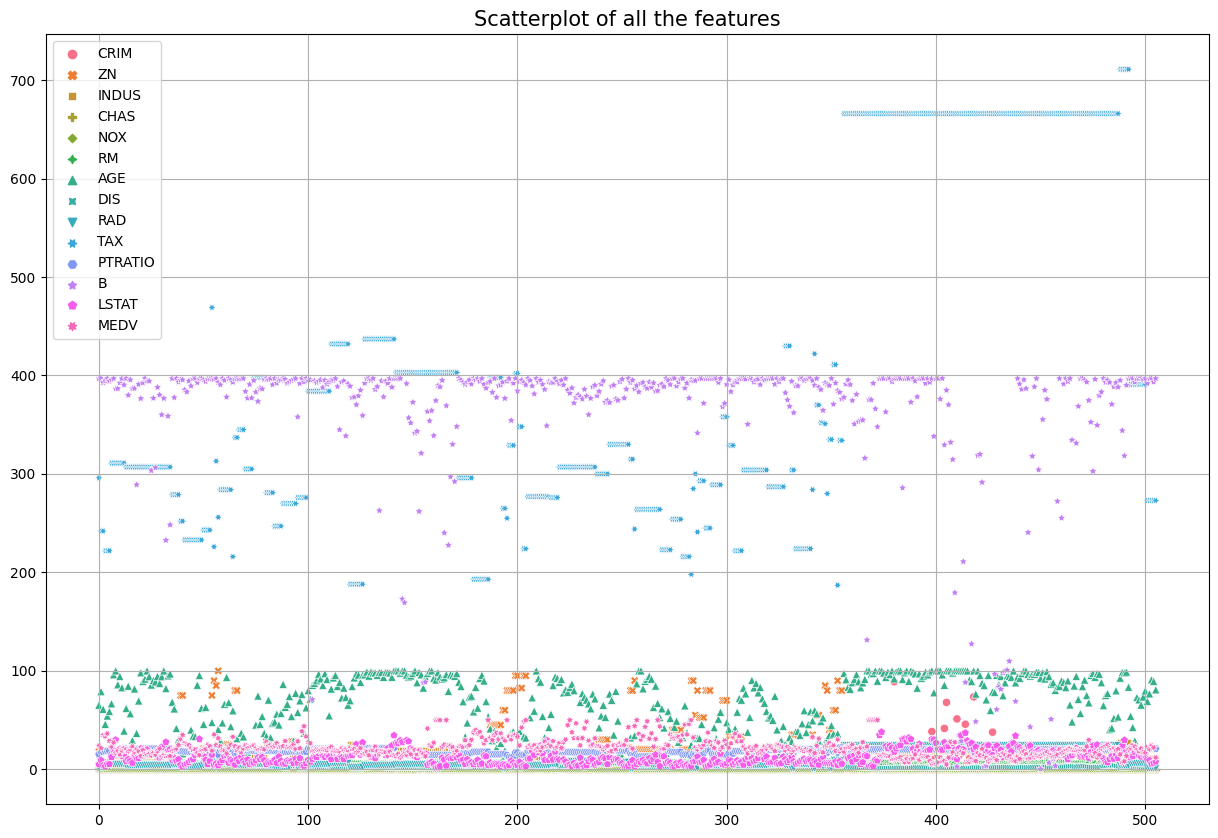

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df)
plt.title('Scatterplot of all the features', fontsize=15)
plt.grid(True)
plt.show()

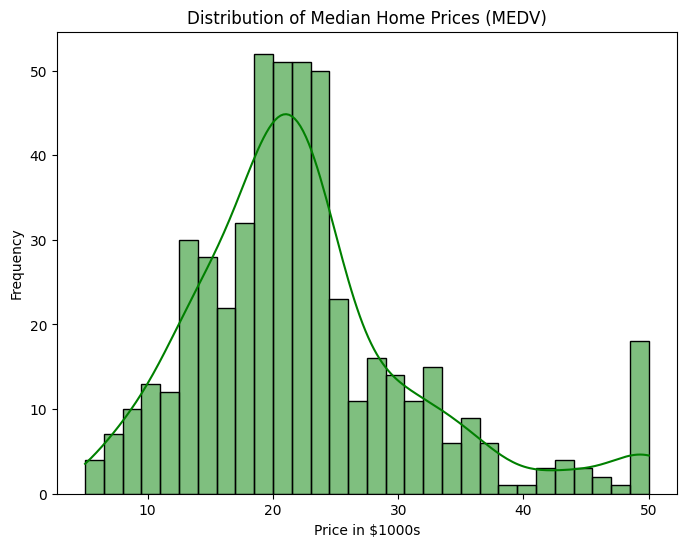

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='green')
plt.title('Distribution of Median Home Prices (MEDV)')
plt.xlabel('Price in $1000s')
plt.ylabel('Frequency')
plt.show()

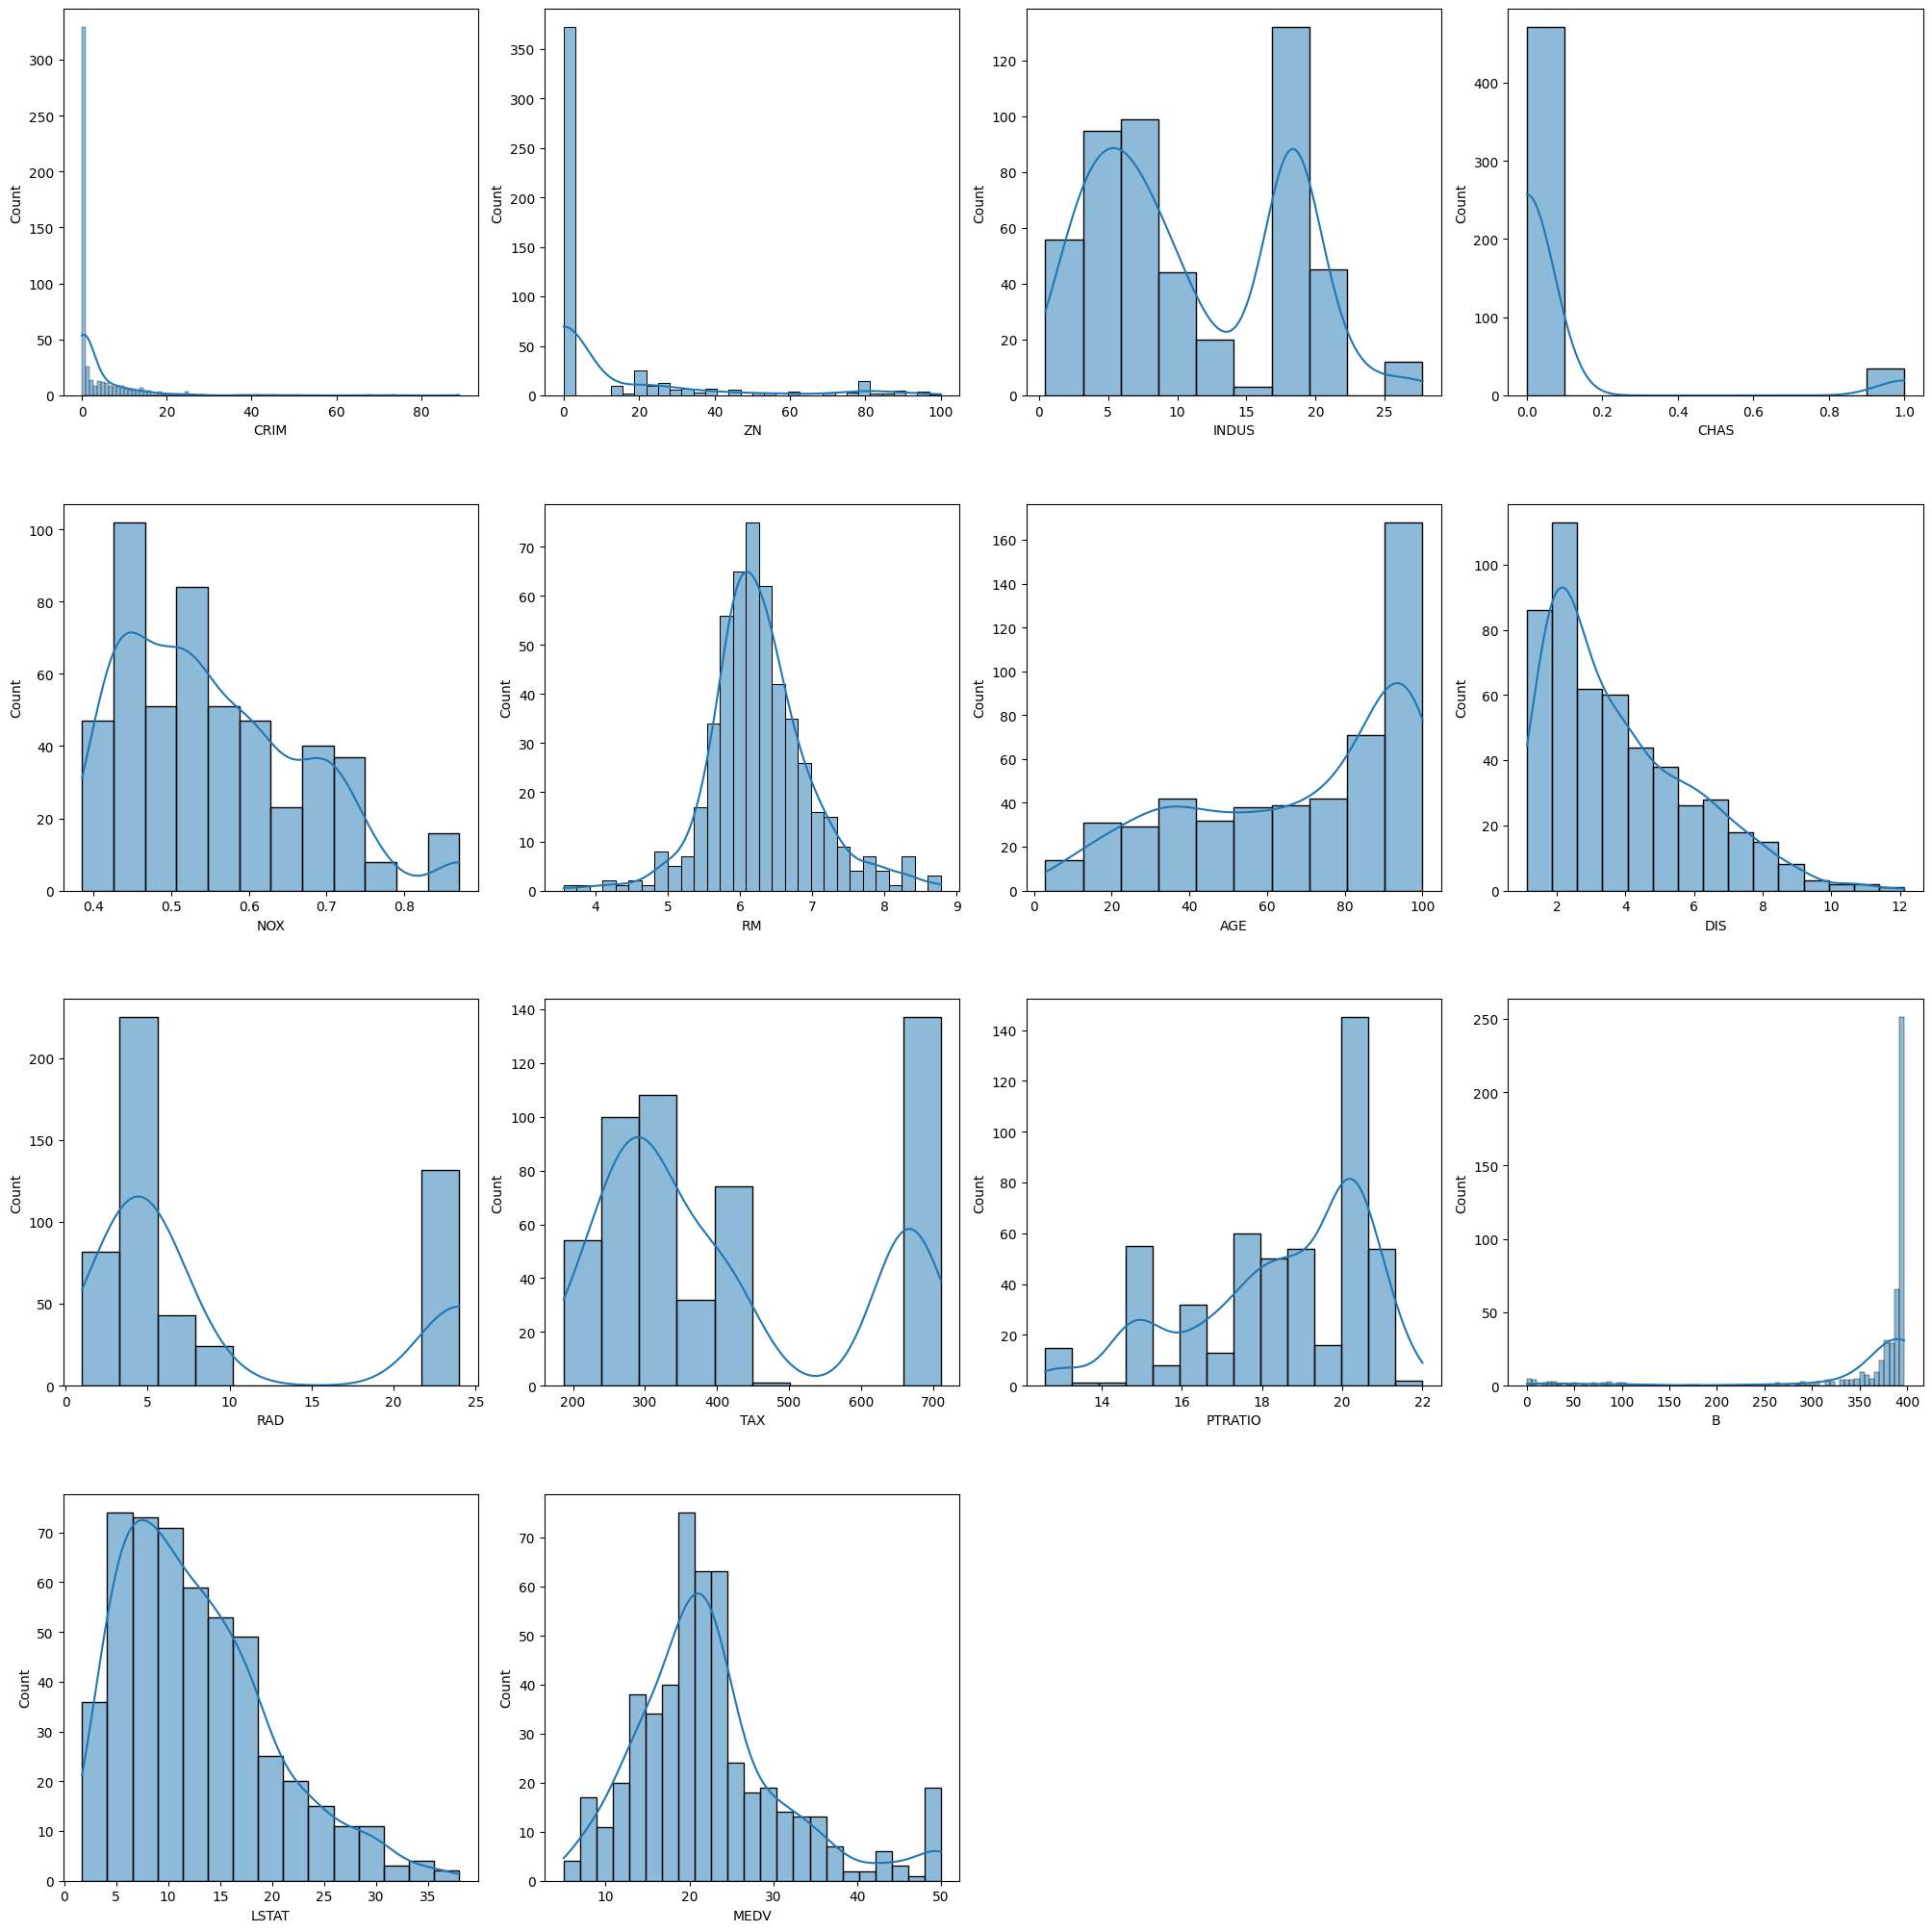

In [65]:
#For all features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)   
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
axs = axs.flatten()  

# Plot each numeric column's histogram
for index, k in enumerate(numeric_columns):
    sns.histplot(x=k, data=df, ax=axs[index], kde=True, bins='auto')
for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [66]:
(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

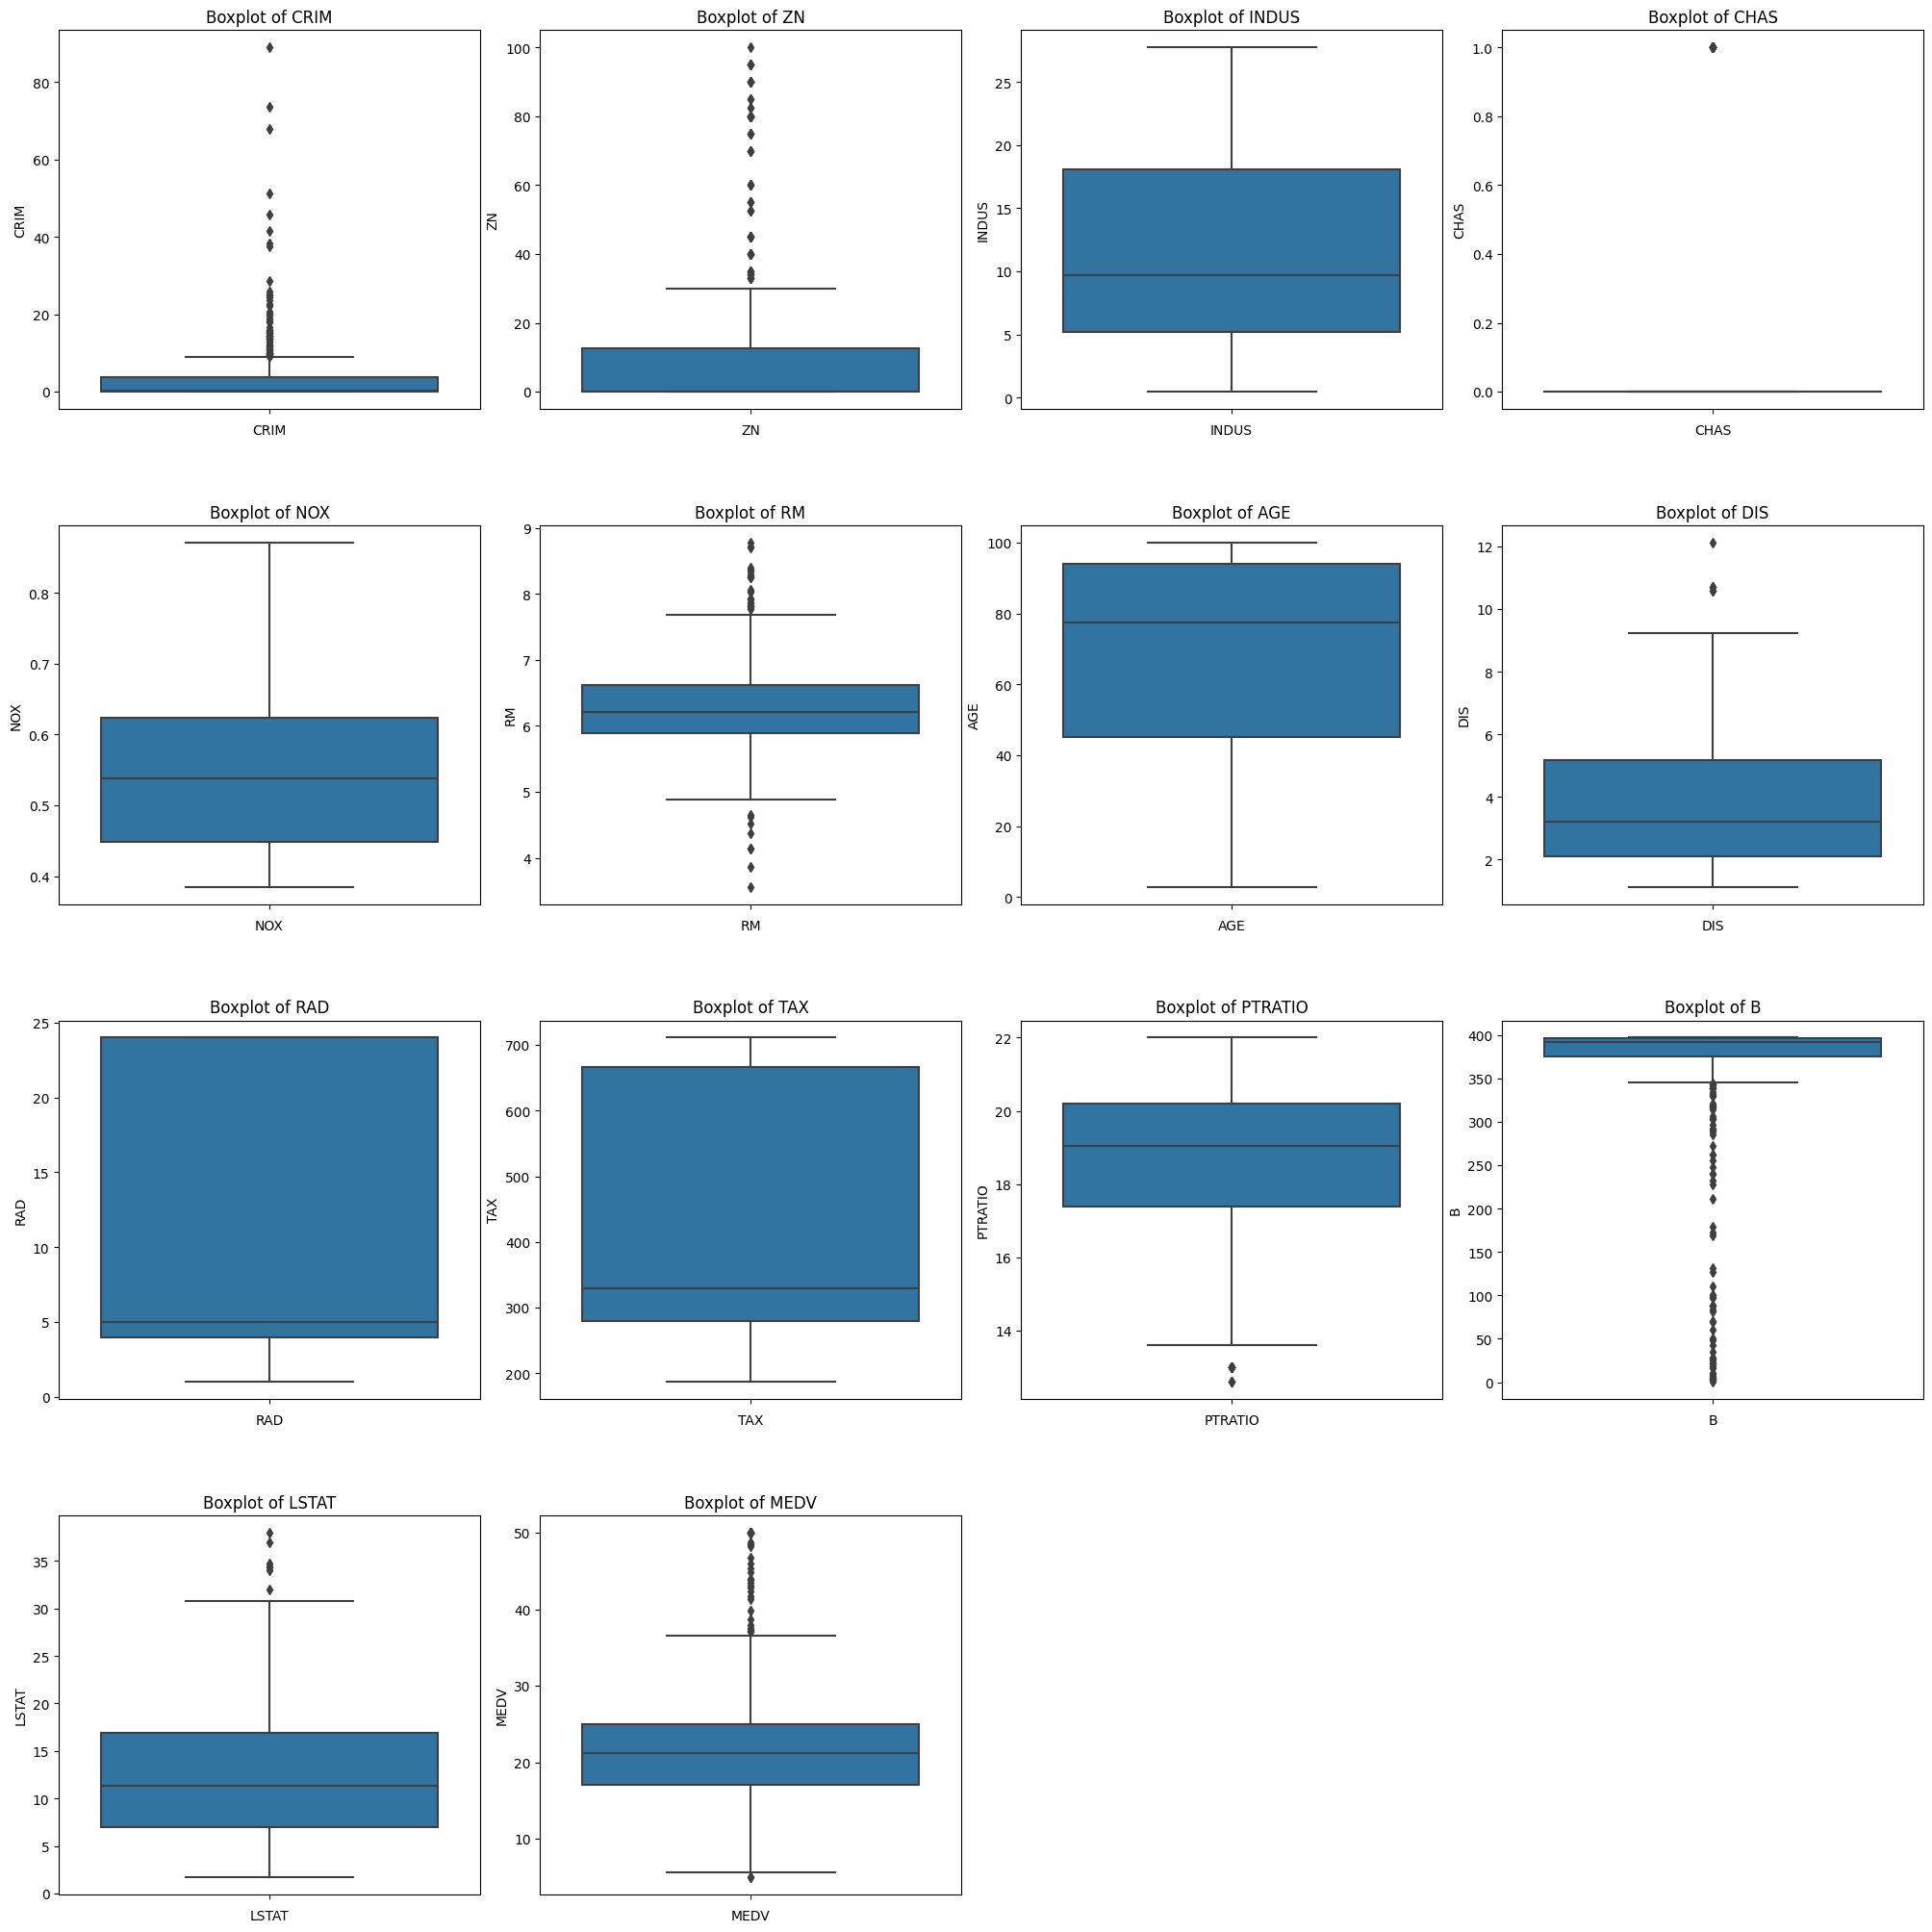

In [67]:
#boxplot for all features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)    
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
index = 0
axs = axs.flatten()
for index, k in enumerate(numeric_columns):
    sns.boxplot(y=k, data=df, ax=axs[index])
    axs[index].set_title(f'Boxplot of {k}') 
    axs[index].set_xlabel(k)  

for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

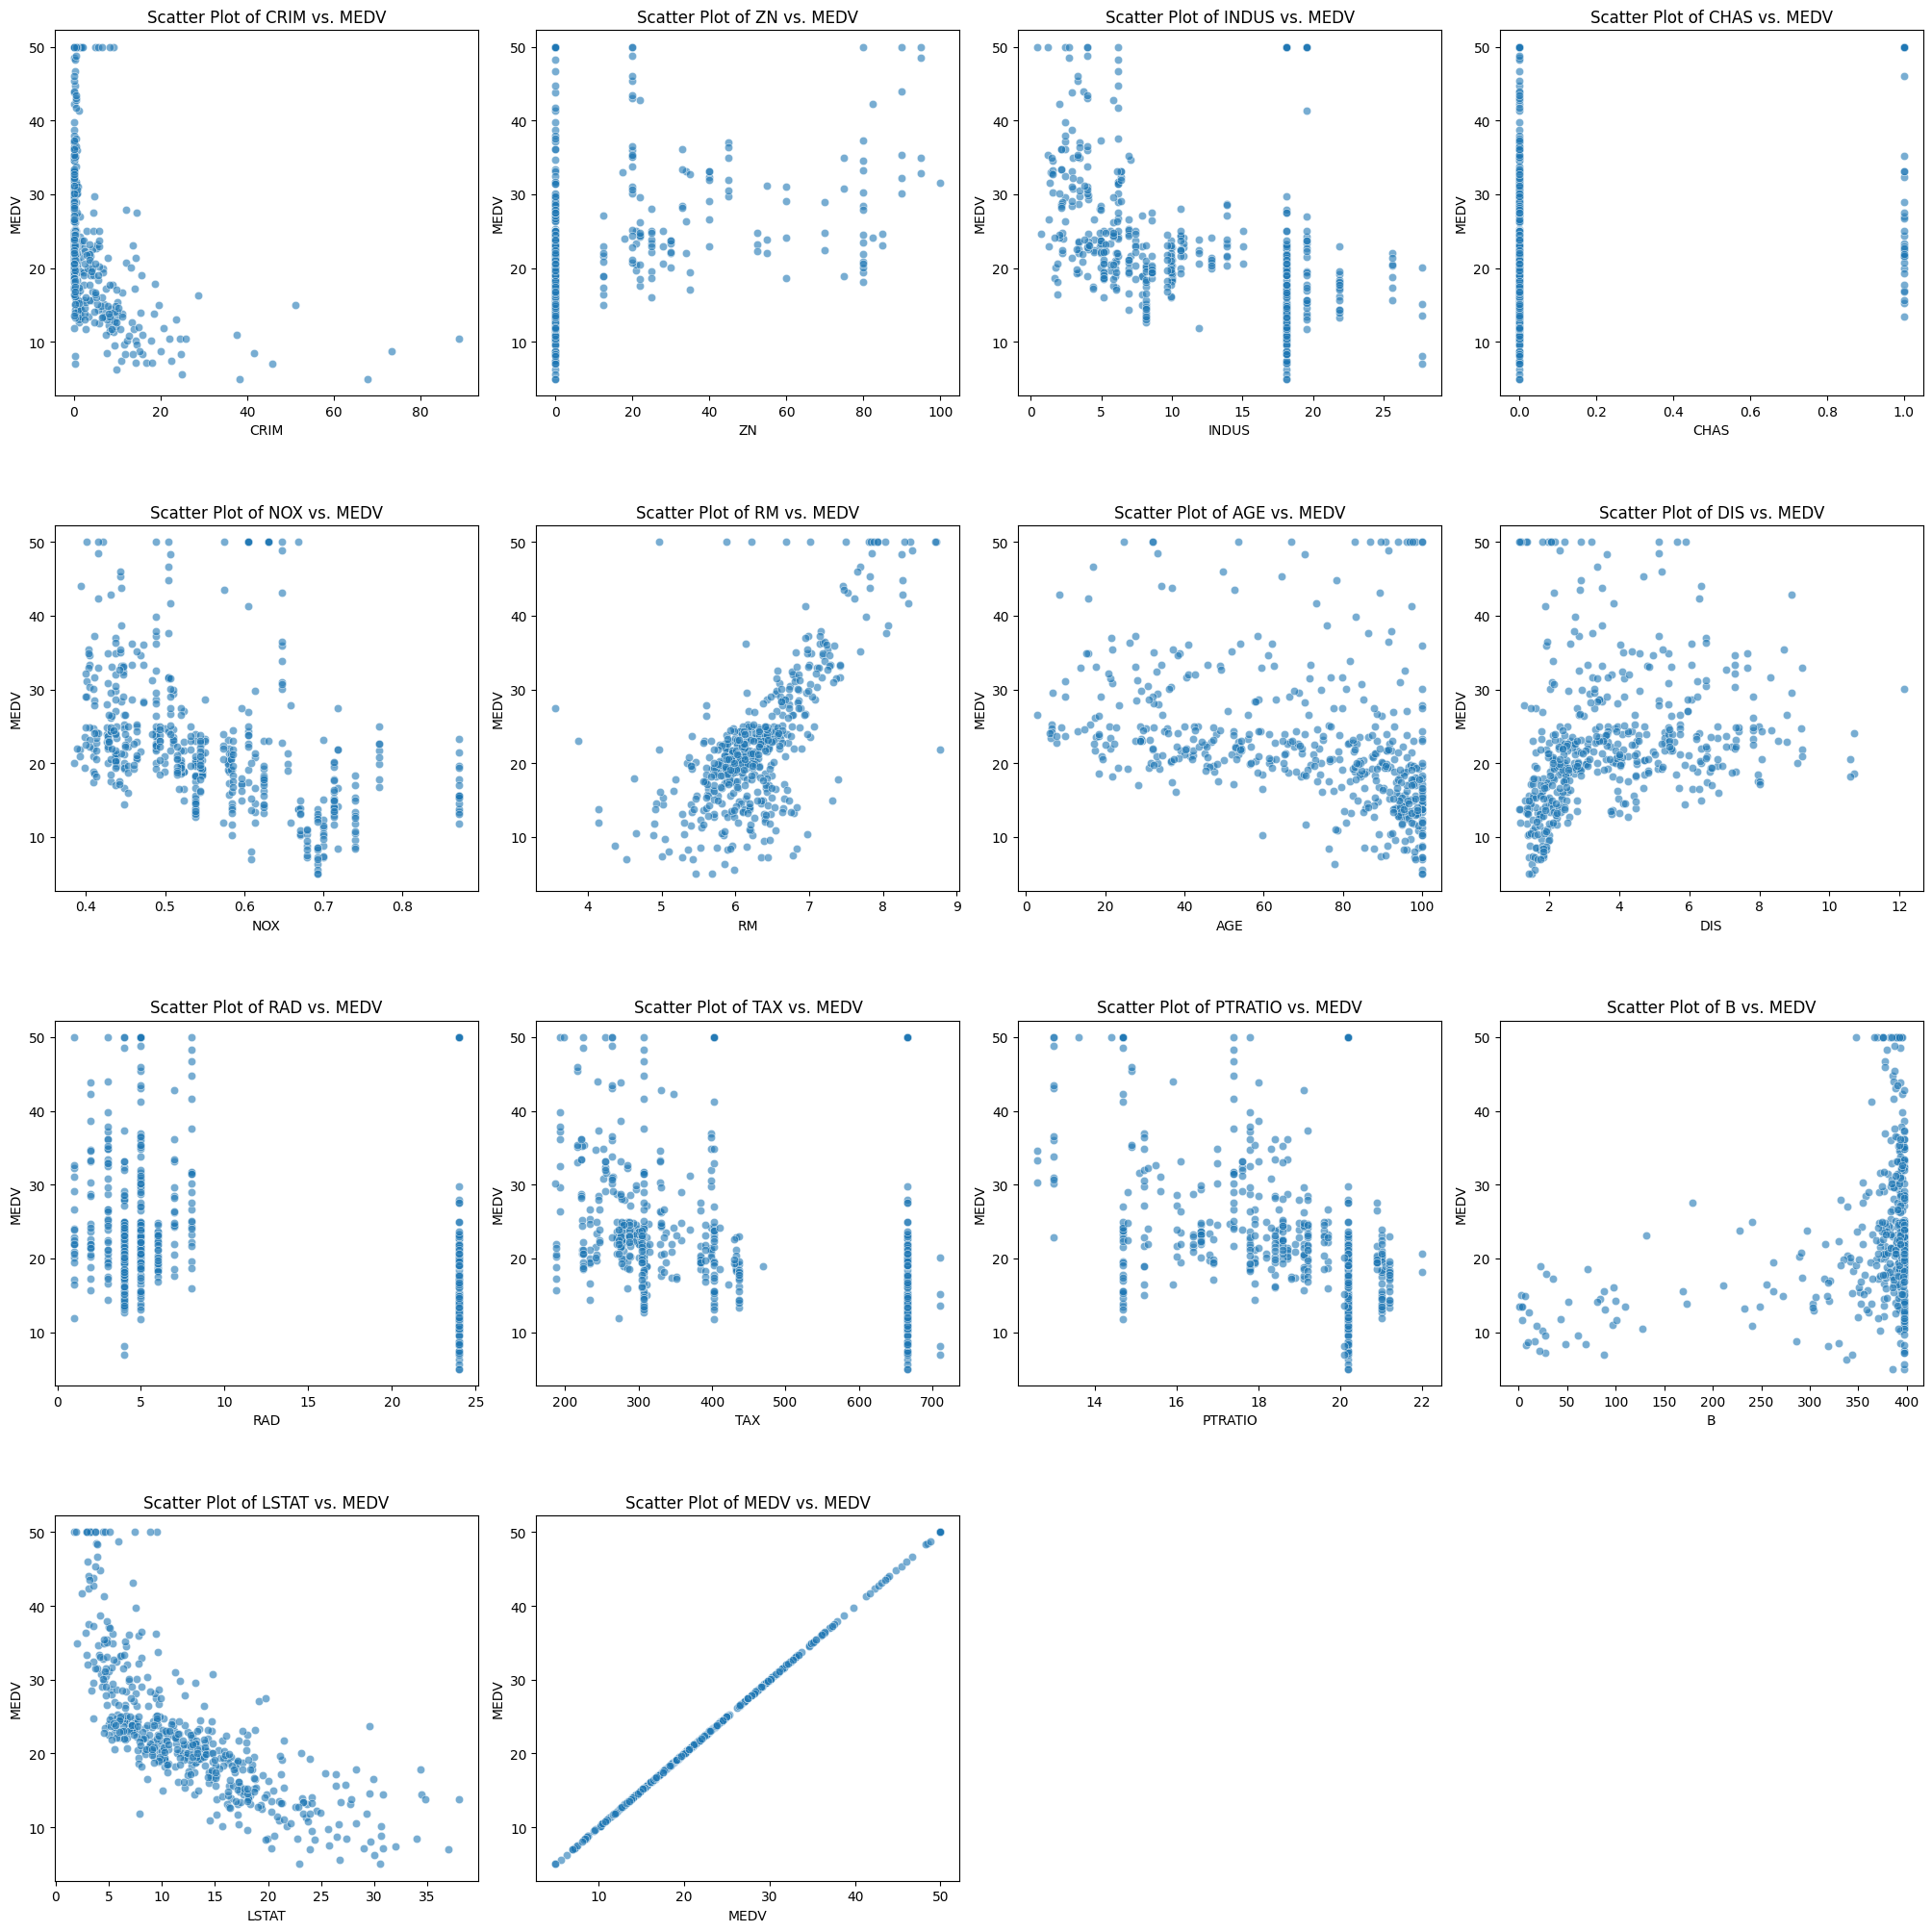

In [68]:
#scatterplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)    
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
index = 0
axs = axs.flatten()
for index, k in enumerate(numeric_columns):
    sns.scatterplot(x=df[k], y=df['MEDV'], ax=axs[index], alpha=0.6)  # Scatter plot
    axs[index].set_title(f'Scatter Plot of {k} vs. MEDV') 
    axs[index].set_xlabel(k)  
    axs[index].set_ylabel('MEDV')   

for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

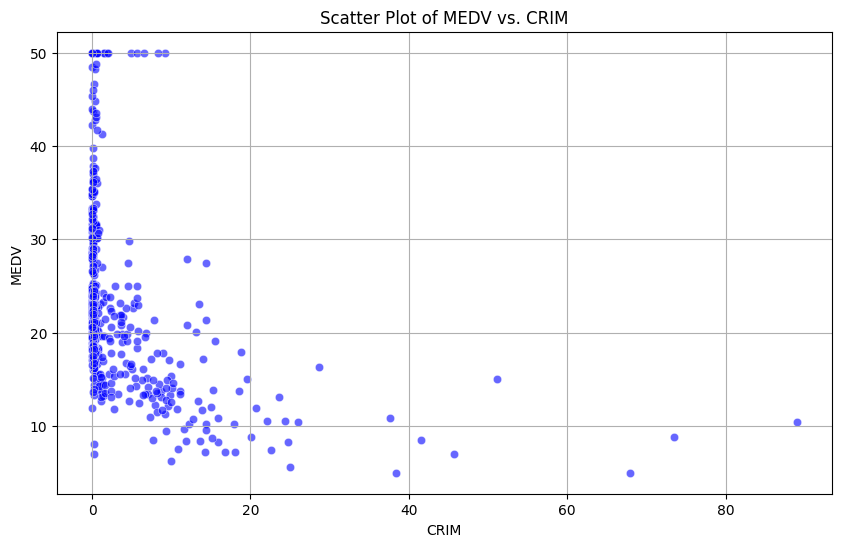

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CRIM'], y=df['MEDV'], alpha=0.6, color='blue')

plt.title('Scatter Plot of MEDV vs. CRIM')  
plt.xlabel('CRIM')  
plt.ylabel('MEDV')  

plt.grid(True) 
plt.show()  


From all the three plots, i.e., histograph,scatterplot and boxplot, it can be seen that it is very difficult to visualize the main features that is responsible for predicting the output. So, we need to choose only the feature that mostly contribute in predicting the output or target value.
To choose the features,
1. Either choose randomly the features that you think can affect the ouput mostly, but here some feature might be missed as we don't know the data completely just seeing the name,vale and graph. So, with this plot doesn't seem that much satisfactory
2. Use correlation with the target variable (PRICE) to find features that are highly correlated with it and then find the plots for that feature that has the highest coreelation value

In [70]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

Let us choose only the features with correlation value > 0.5

Text(0.5, 1.0, 'Correlation Matrix')

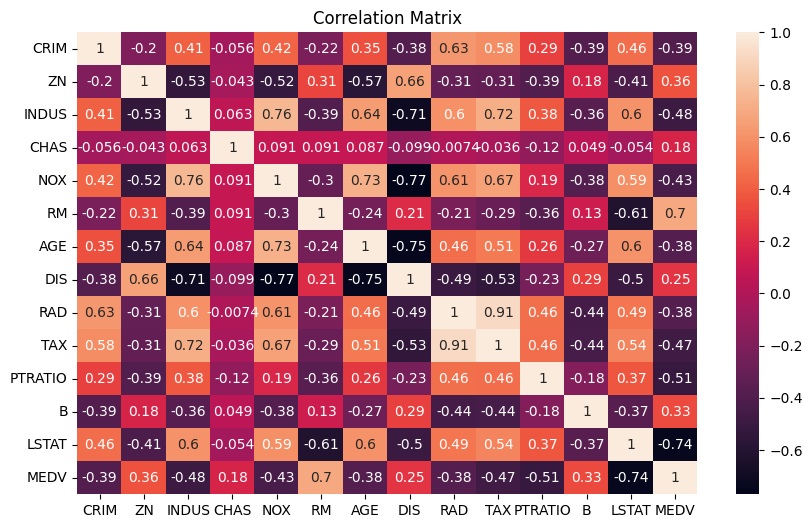

In [71]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

In [72]:
df_selected_features = correlation_matrix.loc[correlation_matrix['MEDV'].abs() > 0.5,['MEDV']]
df_selected_features

MEDV
RM       0.695360
PTRATIO -0.507787
LSTAT   -0.737663
MEDV     1.000000

In [73]:
list_of_features = df_selected_features.index.tolist()
list_of_features

['RM', 'PTRATIO', 'LSTAT', 'MEDV']

The features with greater than 0.5 correlation value with PRICE are RM,PTRARTIO,LSTAT

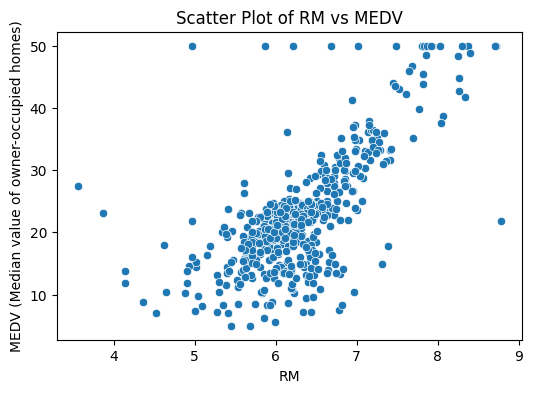

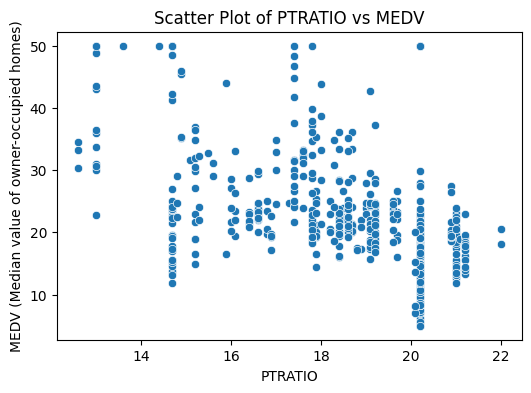

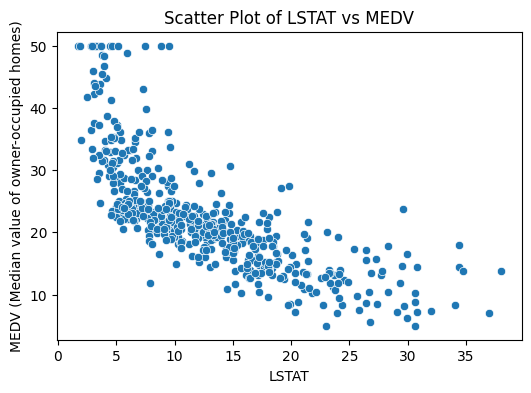

In [74]:
selected_features = ['RM', 'PTRATIO', 'LSTAT']

# Loop through each selected feature and create a scatter plot against MEDV
for feature in selected_features:
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.scatterplot(data=df, x=feature, y='MEDV')
    
    # Add title and labels
    plt.title(f'Scatter Plot of {feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV (Median value of owner-occupied homes)')
    
    # Show the plot
    plt.show()

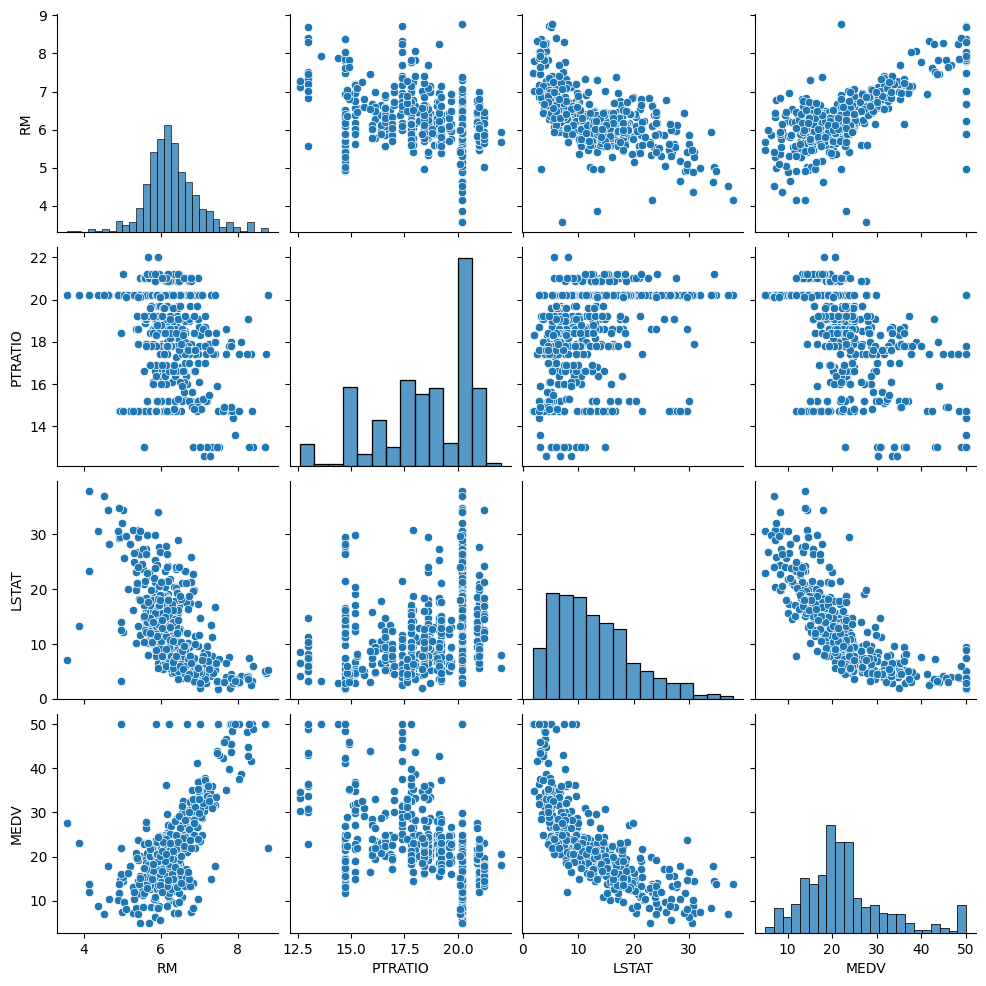

In [75]:
selected_features = ['RM', 'PTRATIO', 'LSTAT', 'MEDV']

# Create a pairplot for the selected features
sns.pairplot(df[selected_features], kind='scatter')

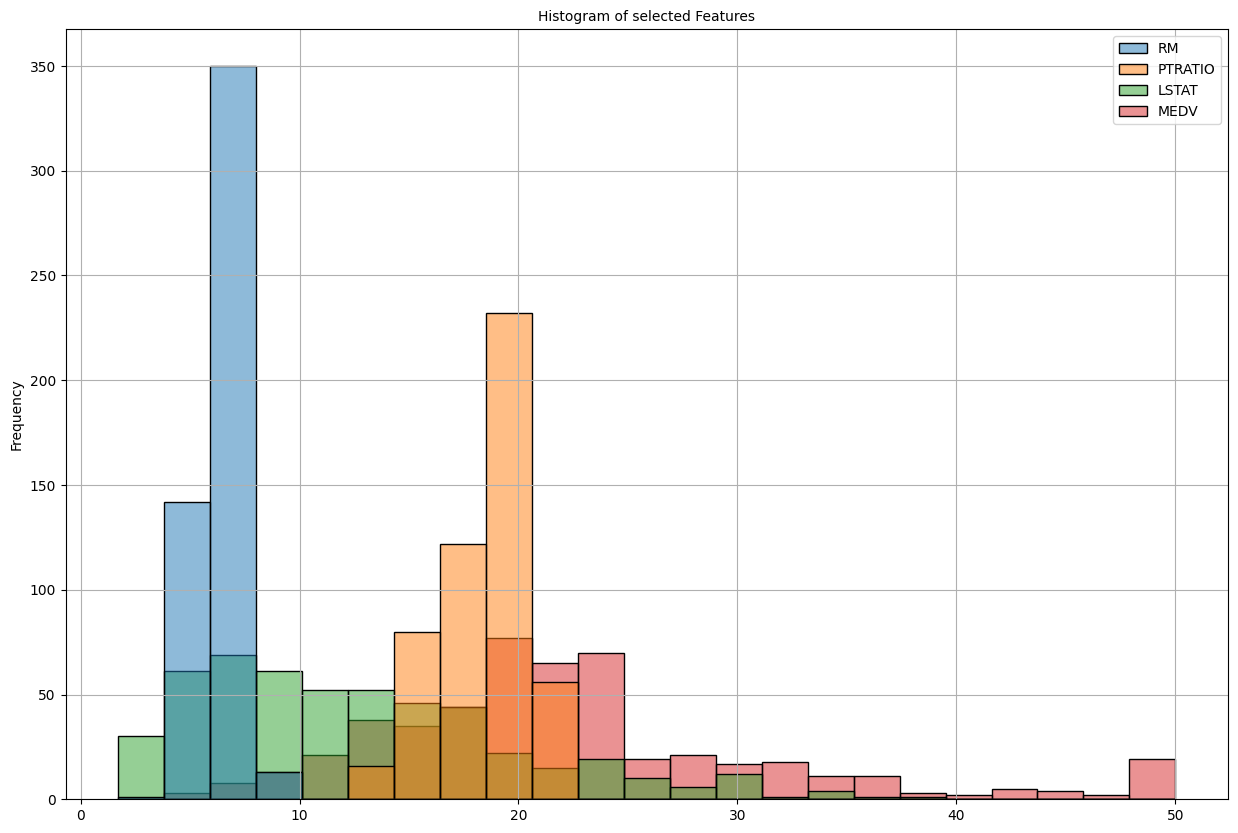

In [77]:
#Histogram
plt.figure(figsize=(15,10))
sns.histplot(df[list_of_features],bins='auto')
plt.ylabel('Frequency')
plt.title('Histogram of selected Features', fontsize=10)
plt.grid(True)
plt.show()

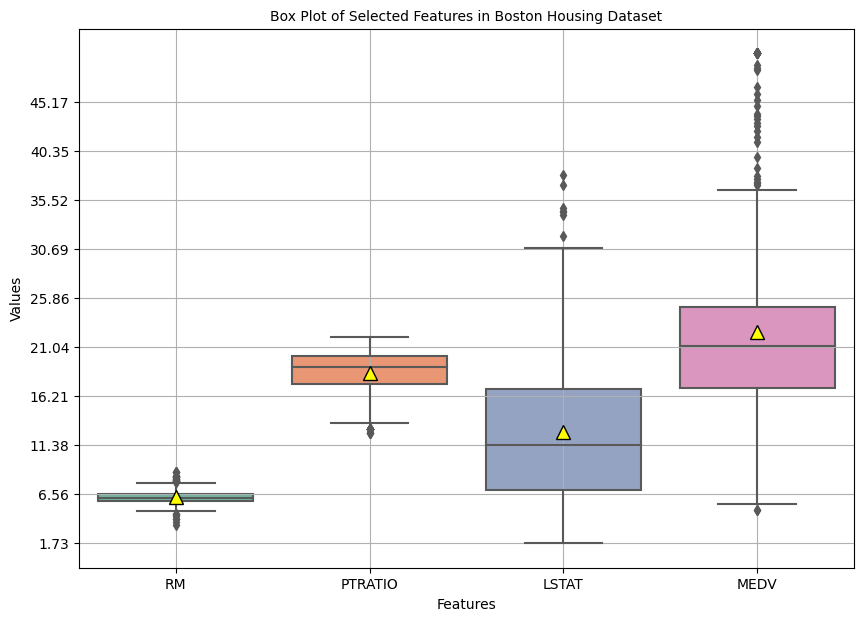

In [78]:
import numpy as np
y_min = df[list_of_features].min().min()  
y_max = df[list_of_features].max().max()  

yticks_range = np.arange(y_min, y_max, step=(y_max - y_min) / 10)  

plt.figure(figsize=(10,7))
sns.boxplot(data=df[list_of_features], showmeans=True, 
            meanprops={"marker": "^", "markeredgecolor": "blacK", "markersize": "10","markerfacecolor":'yellow'},palette='Set2')
plt.grid(True)
# Set y-ticks for better visibility of box plot values
plt.yticks(yticks_range)
plt.title('Box Plot of Selected Features in Boston Housing Dataset', fontsize=10)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.show()


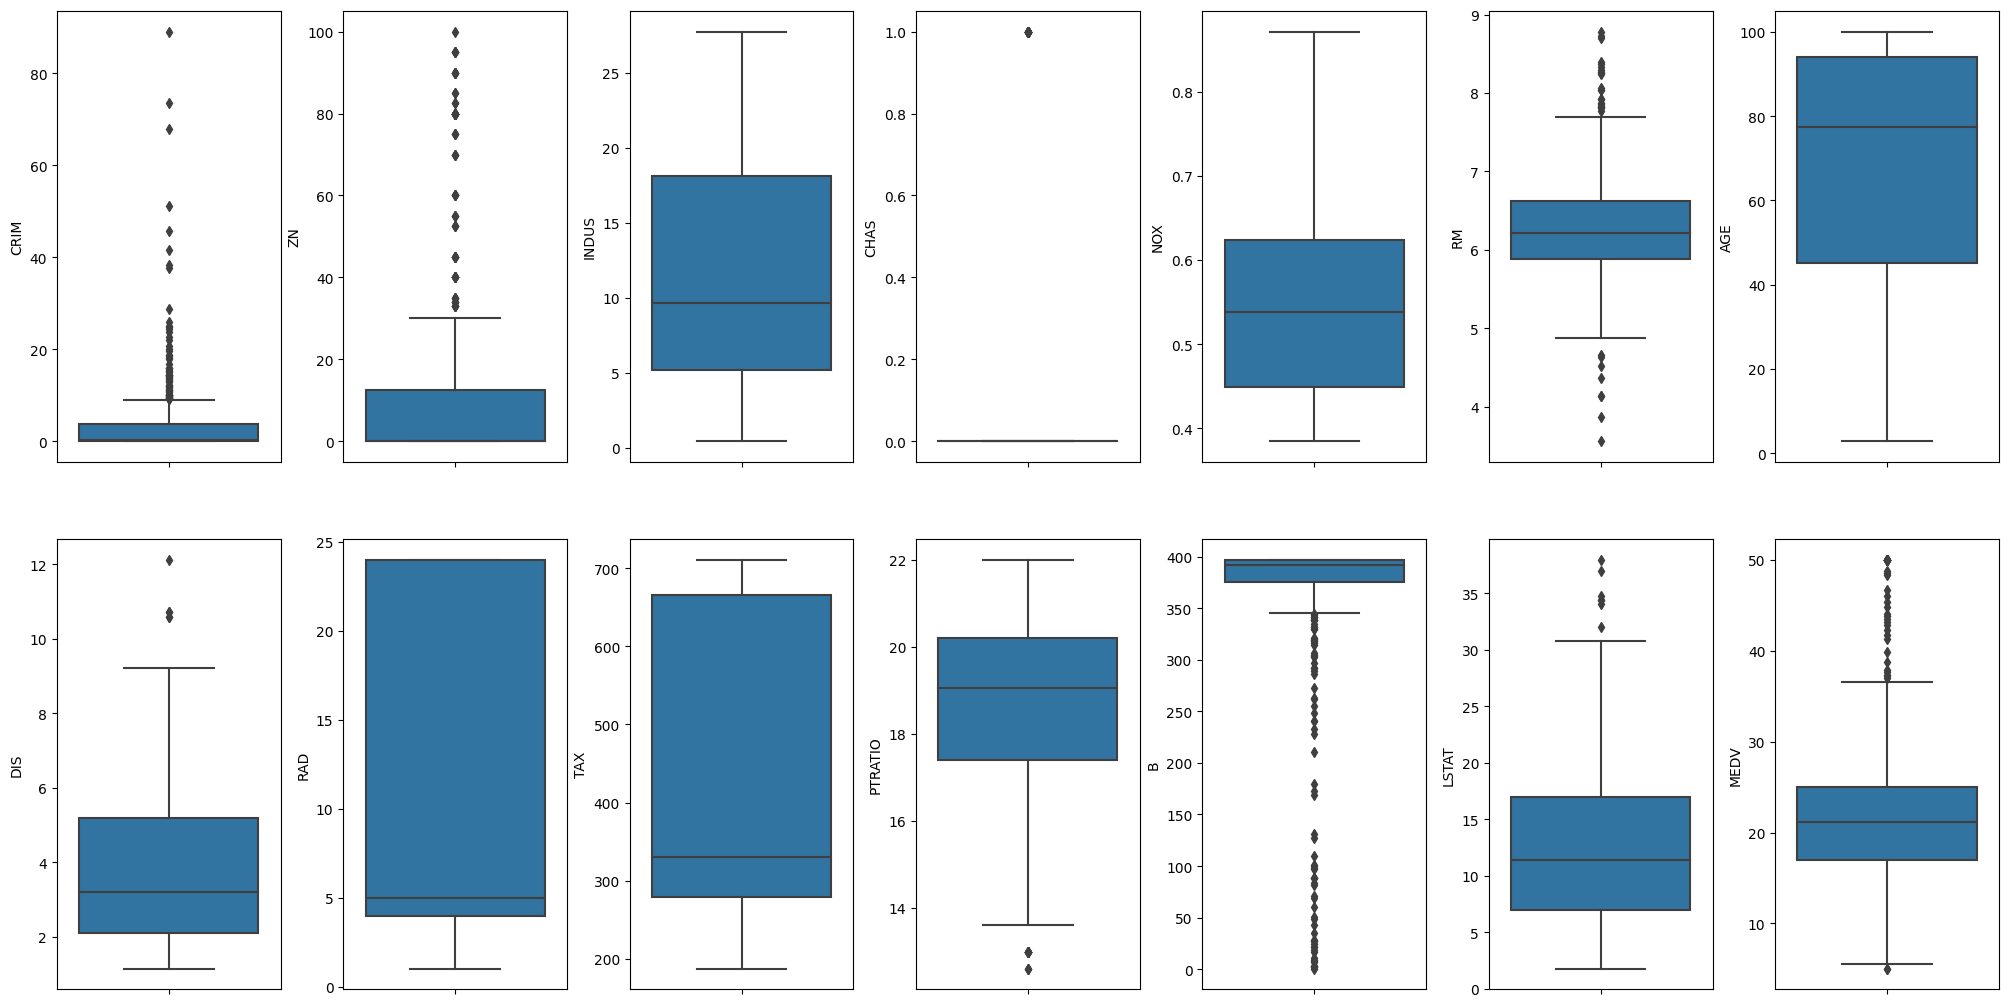

In [79]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

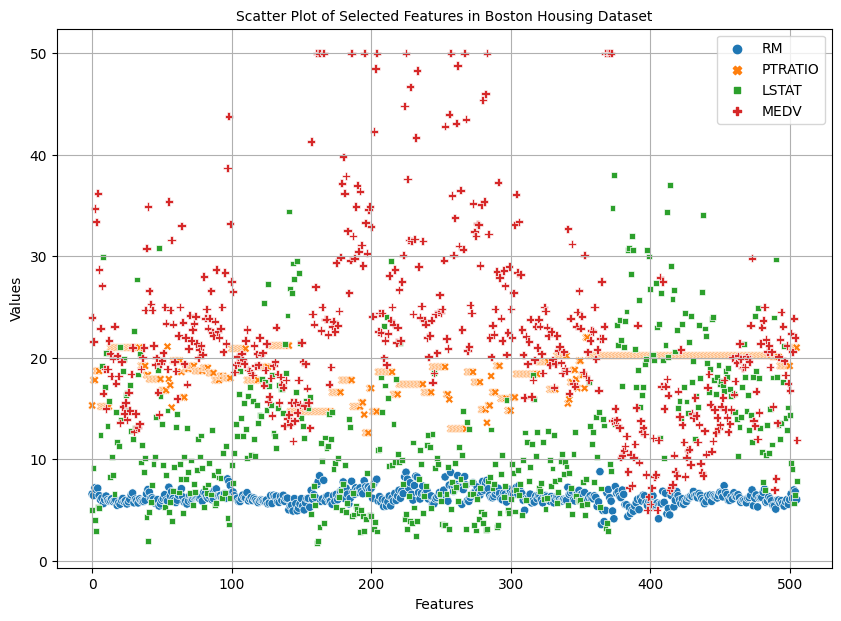

In [80]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df[list_of_features])
plt.title('Scatter Plot of Selected Features in Boston Housing Dataset', fontsize=10)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.grid(True)


Task 2: Regression Analysis (25 points).
1. Model Implementation: Using the provided code as a base, implement linear, ridge, lasso, andOLS regression models.
2. Model Evaluation: Evaluate each model's performance using the R^2 score and MeanSquared Error (MSE). Discuss the implications of these metrics in the context of model selection.
3. Report results for simple and multiple linear regression.


In [81]:
#Importing Libraray
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



In [82]:
df.head()



CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [83]:
#Dropping target variable MEDV
X = df.drop('MEDV',axis=1)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [84]:
y = df['MEDV']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Multiple Regression without feature scaling


OLS Regression Coefficients:
 const      14.588099
RM          4.933118
PTRATIO    -0.867095
LSTAT      -0.567126
dtype: float64

Linear Regression Coefficients:
 [ 4.93311836 -0.86709475 -0.56712588]

Ridge Regression Coefficients:
 [ 4.89398523 -0.86837965 -0.56934474]

Lasso Regression Coefficients:
 [ 4.90376117 -0.86638211 -0.56880239]
OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6309
Ridge Regression MSE: 27.0673

Lasso Regression R^2 score: 0.6307
Lasso Regression MSE: 27.0806



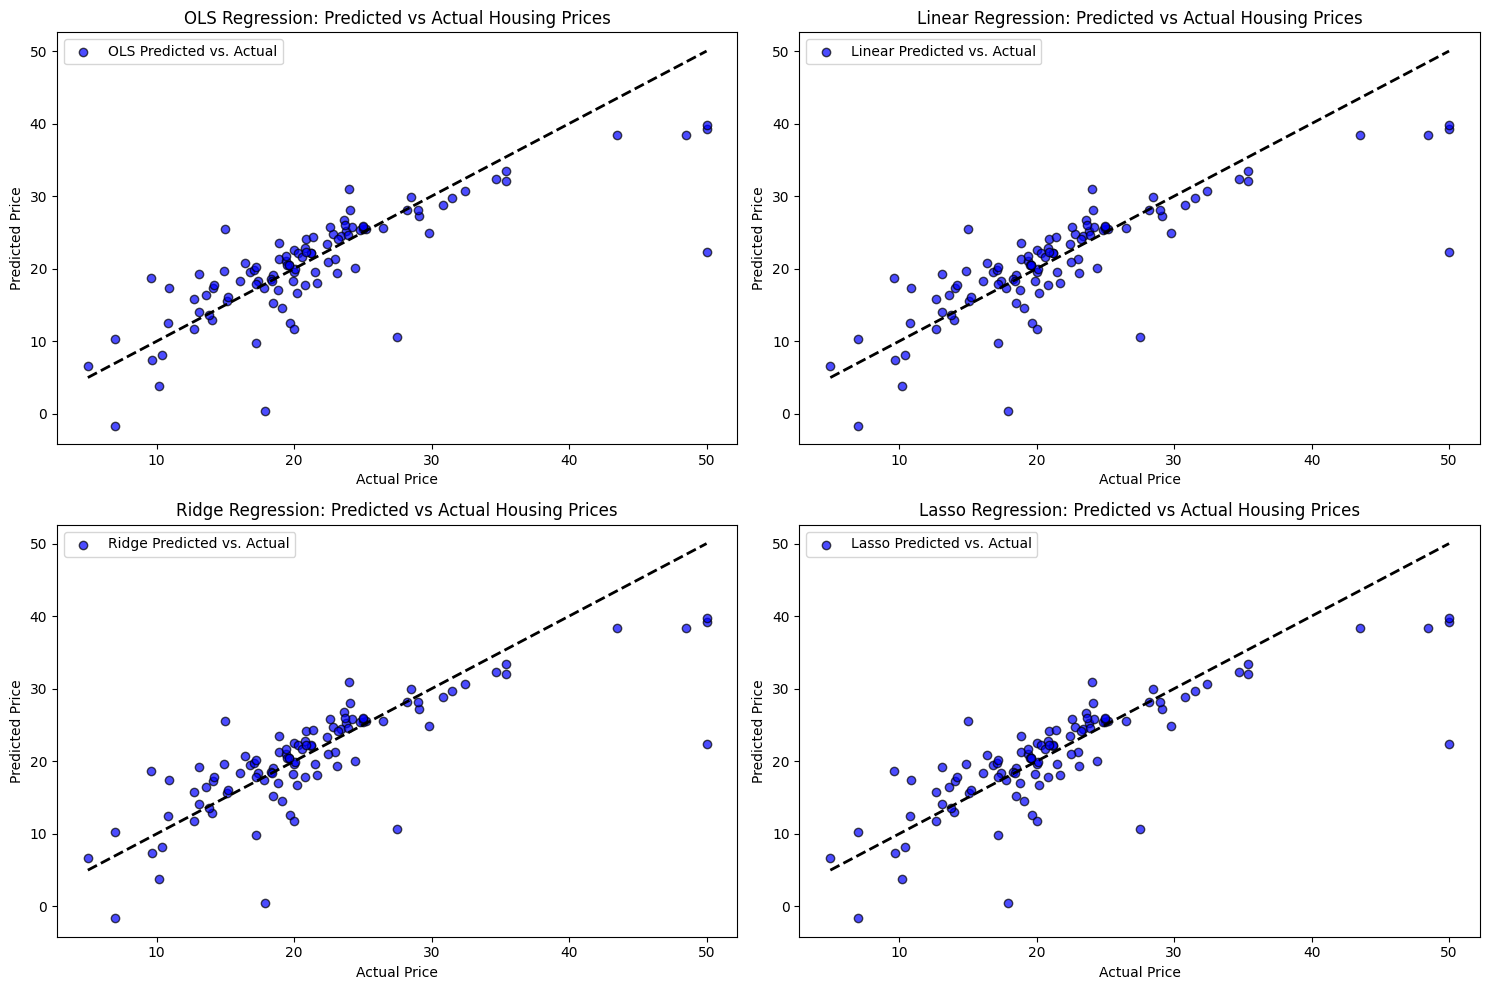

In [111]:

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


#### MULTIPLE REGRESSION WITH FEATURE SCALING


OLS Regression Coefficients:
 const      14.588099
RM          4.933118
PTRATIO    -0.867095
LSTAT      -0.567126
dtype: float64

Linear Regression Coefficients:
 [ 3.49547535 -1.9301017  -4.02748733]

Ridge Regression Coefficients:
 [ 3.45625211 -1.9214817  -3.95668154]

Lasso Regression Coefficients:
 [ 3.49066024 -1.9235011  -4.02281427]
OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6322
Ridge Regression MSE: 26.9712

Lasso Regression R^2 score: 0.6304
Lasso Regression MSE: 27.1021



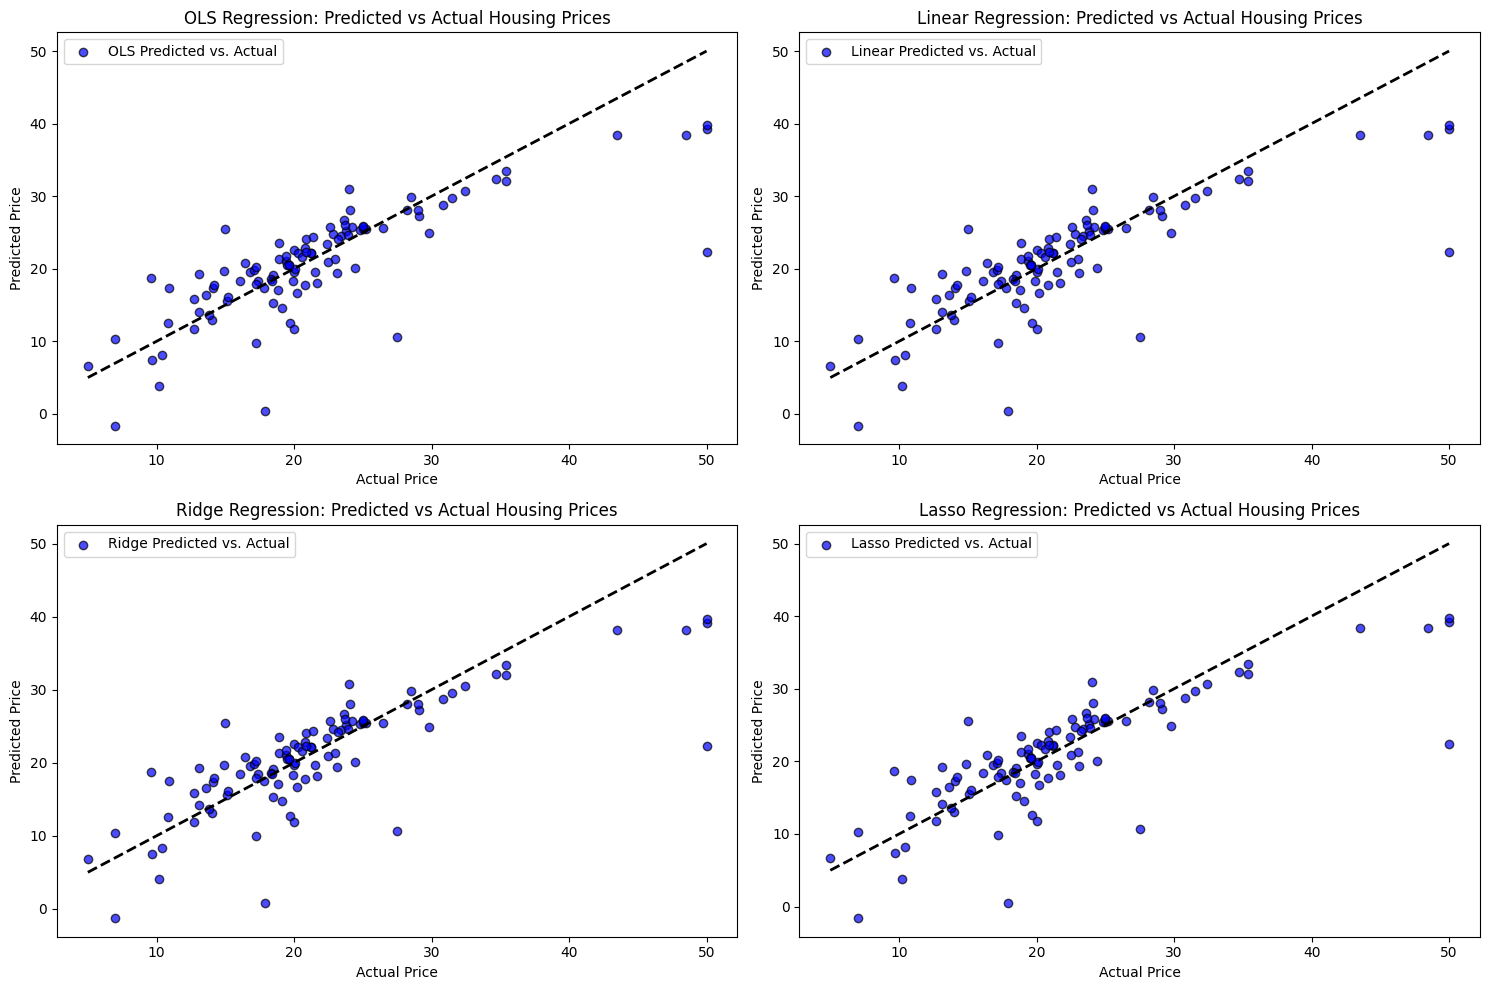

In [110]:

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


## Discuss the importance of feature scaling

Feature scaling little bit decreased the MSE and r square value for each different types of regression.
Also, from the above two model with and without feature scaling we can see, the coefficient value has been reduced too significantly for Linear, Lasso and Ridge Regression. While in OLS there is no change in MSE,r aquare values and coeeficients

### Now let us try to improve the values by using outlier removal


In [88]:
#outlier counts
for k, v in df.items():
    if df[k].dtype == 'object':
        continue 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")


Column 'CRIM' has 66 outliers
Column 'ZN' has 68 outliers
Column 'INDUS' has 0 outliers
Column 'CHAS' has 35 outliers
Column 'NOX' has 0 outliers
Column 'RM' has 30 outliers
Column 'AGE' has 0 outliers
Column 'DIS' has 5 outliers
Column 'RAD' has 0 outliers
Column 'TAX' has 0 outliers
Column 'PTRATIO' has 15 outliers
Column 'B' has 77 outliers
Column 'LSTAT' has 7 outliers
Column 'MEDV' has 40 outliers


In [87]:
#removal of outliers
def remove_outliers(df):
    new_df = df.copy()

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

    return new_df
cleaned_df = remove_outliers(df)
cleaned_df.head()




CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172  96.1  5.9505  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1

In [89]:
cleaned_df.shape

(214, 14)

In [91]:
#Dropping target variable MEDV
X = cleaned_df.drop('MEDV',axis=1)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172  96.1  5.9505  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15

In [92]:
X.shape

(214, 13)

In [93]:
y= cleaned_df['MEDV']
y.head()

0    24.0
1    21.6
5    28.7
6    22.9
7    27.1
Name: MEDV, dtype: float64

In [94]:
y.shape

(214,)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### With outlier removal and feature scaled

OLS Regression R^2 score: 0.6938
OLS Regression MSE: 3.3628

Linear Regression R^2 score: 0.6938
Linear Regression MSE: 3.3628

Ridge Regression R^2 score: 0.6970
Ridge Regression MSE: 3.3275

Lasso Regression R^2 score: 0.6830
Lasso Regression MSE: 3.4815



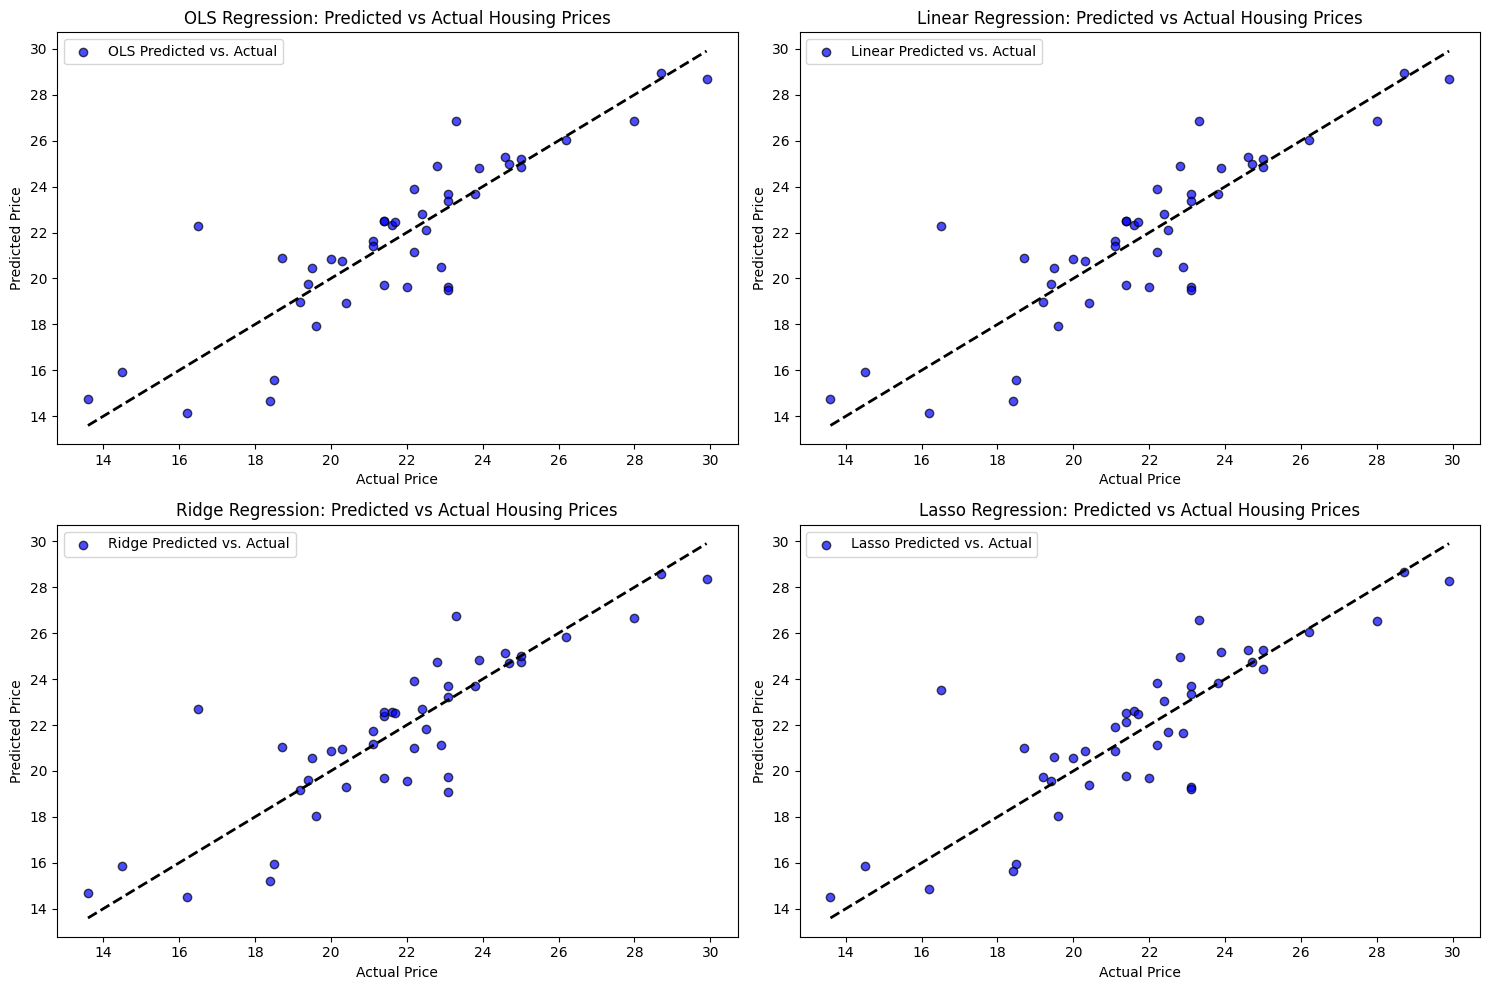

In [96]:

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


SEEMS MSE has improved. Now let us do the same without feature scaling

OLS Regression R^2 score: 0.6938
OLS Regression MSE: 3.3628

Linear Regression R^2 score: 0.6938
Linear Regression MSE: 3.3628

Ridge Regression R^2 score: 0.7019
Ridge Regression MSE: 3.2742

Lasso Regression R^2 score: 0.6955
Lasso Regression MSE: 3.3436



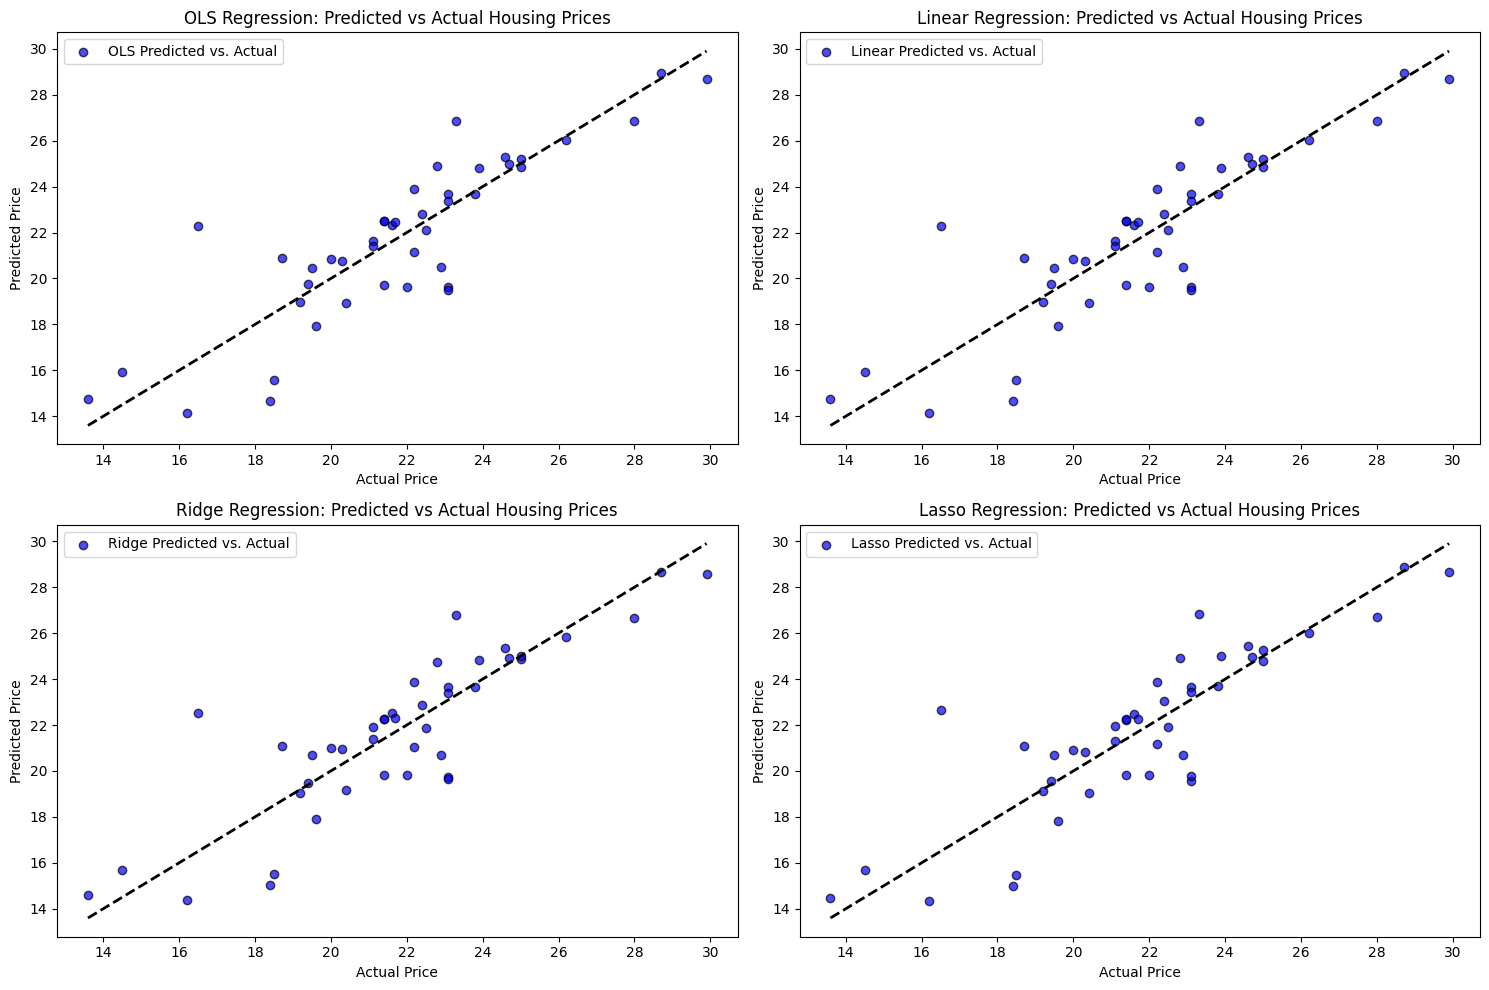

In [97]:
#Multiple Regression without feature scaling

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


NOT MUCH DIFFERENCE.Let us just plot for the important feature whcih contribute to the price i.e., that having correlataion > 0.5

In [99]:
corr_val = df.corr()
selected_features = correlation_matrix.loc[correlation_matrix['MEDV'].abs() > 0.5,['MEDV']]
selected_features

MEDV
RM       0.695360
PTRATIO -0.507787
LSTAT   -0.737663
MEDV     1.000000

In [100]:
#let us take X=['RM','PTRATIO','LSTAT']
X_new = df[['RM','PTRATIO','LSTAT']]
Y_new = df['MEDV']


In [101]:
print(X_new.shape)
print(Y_new.shape)

(506, 3)
(506,)


In [106]:
#Multiple Regression without feature scaling FEATURE RM, PTRATIO, LSTAT as input and MEDV as output

OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6309
Ridge Regression MSE: 27.0673

Lasso Regression R^2 score: 0.6307
Lasso Regression MSE: 27.0806



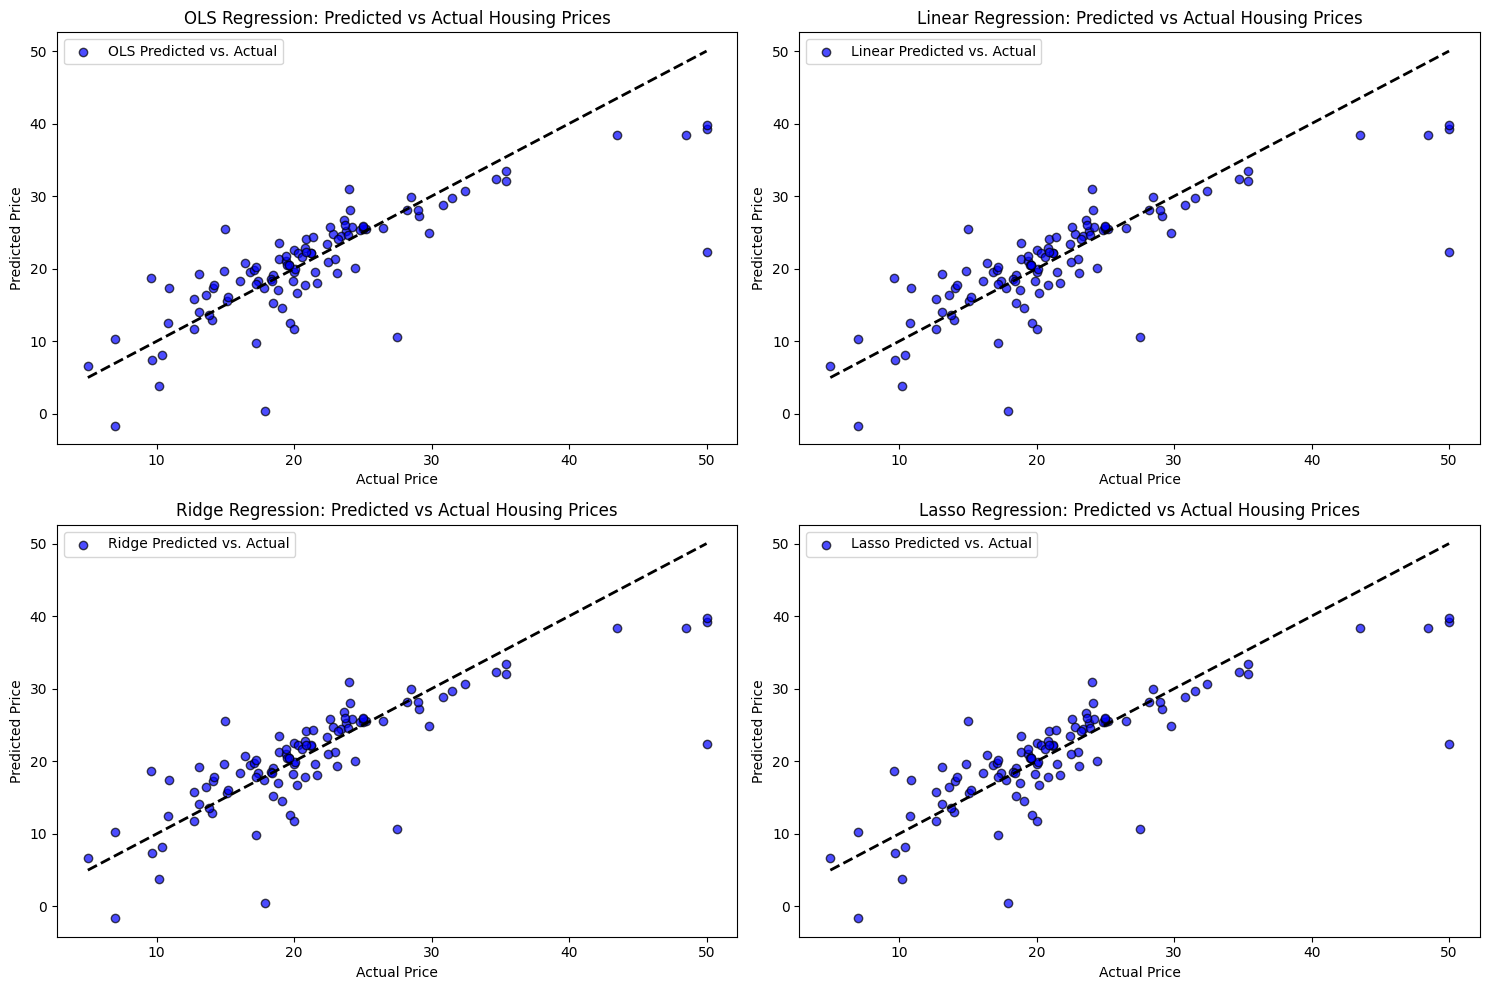

In [107]:

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [104]:
#MODEL USING FEATURE RM, PTRATIO, LSTAT as input and MEDV as output
#Feature are scaled here

OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6322
Ridge Regression MSE: 26.9712

Lasso Regression R^2 score: 0.6304
Lasso Regression MSE: 27.1021



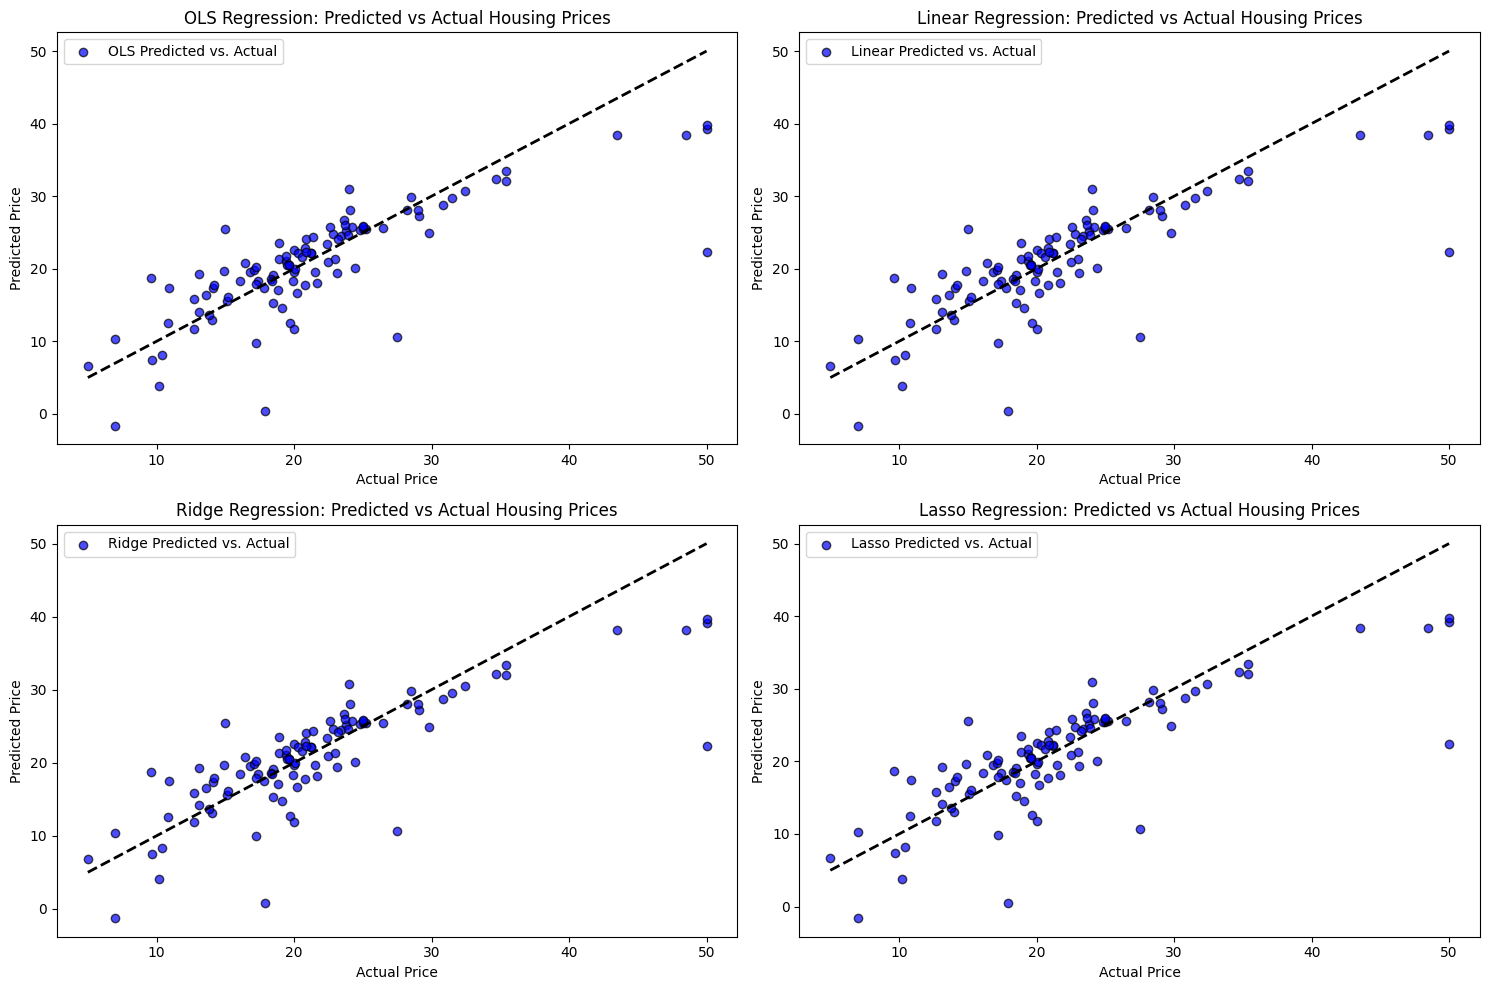

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [149]:
X_new = cleaned_df[['RM','PTRATIO','LSTAT']]
Y_new = cleaned_df['MEDV']

In [108]:
#Now, with outlier removed, Multiple Regression without feature scaling for 

OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6309
Ridge Regression MSE: 27.0673

Lasso Regression R^2 score: 0.6307
Lasso Regression MSE: 27.0806



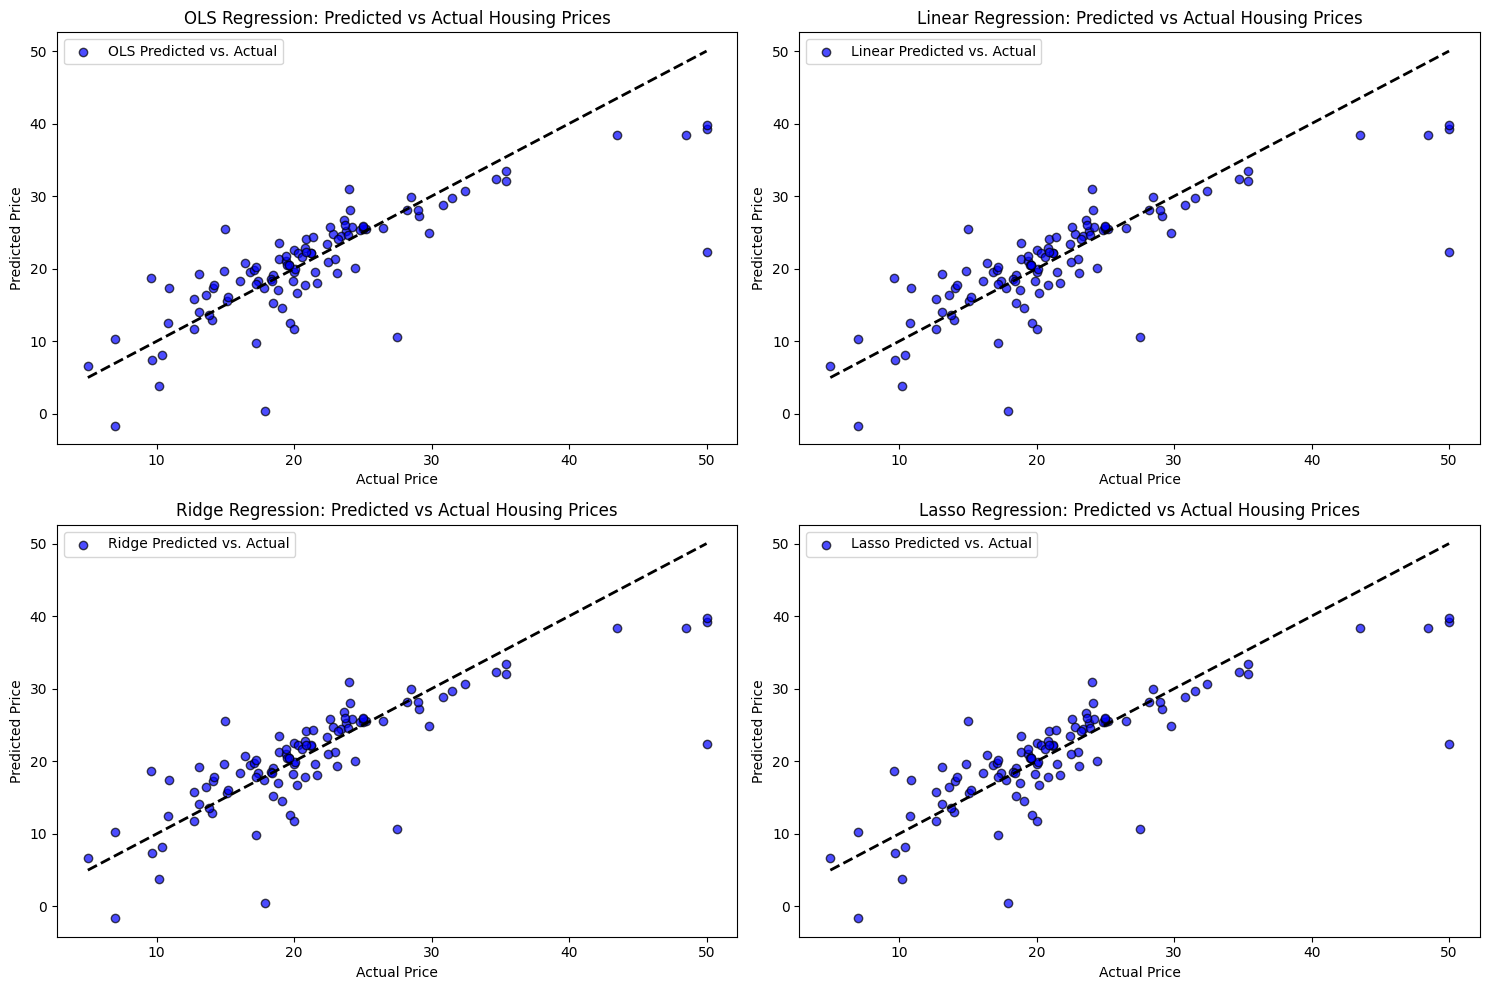

In [109]:

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


OLS Regression R^2 score: 0.4758
OLS Regression MSE: 5.7565

Linear Regression R^2 score: 0.4758
Linear Regression MSE: 5.7565

Ridge Regression R^2 score: 0.4985
Ridge Regression MSE: 5.5075

Lasso Regression R^2 score: 0.4761
Lasso Regression MSE: 5.7537



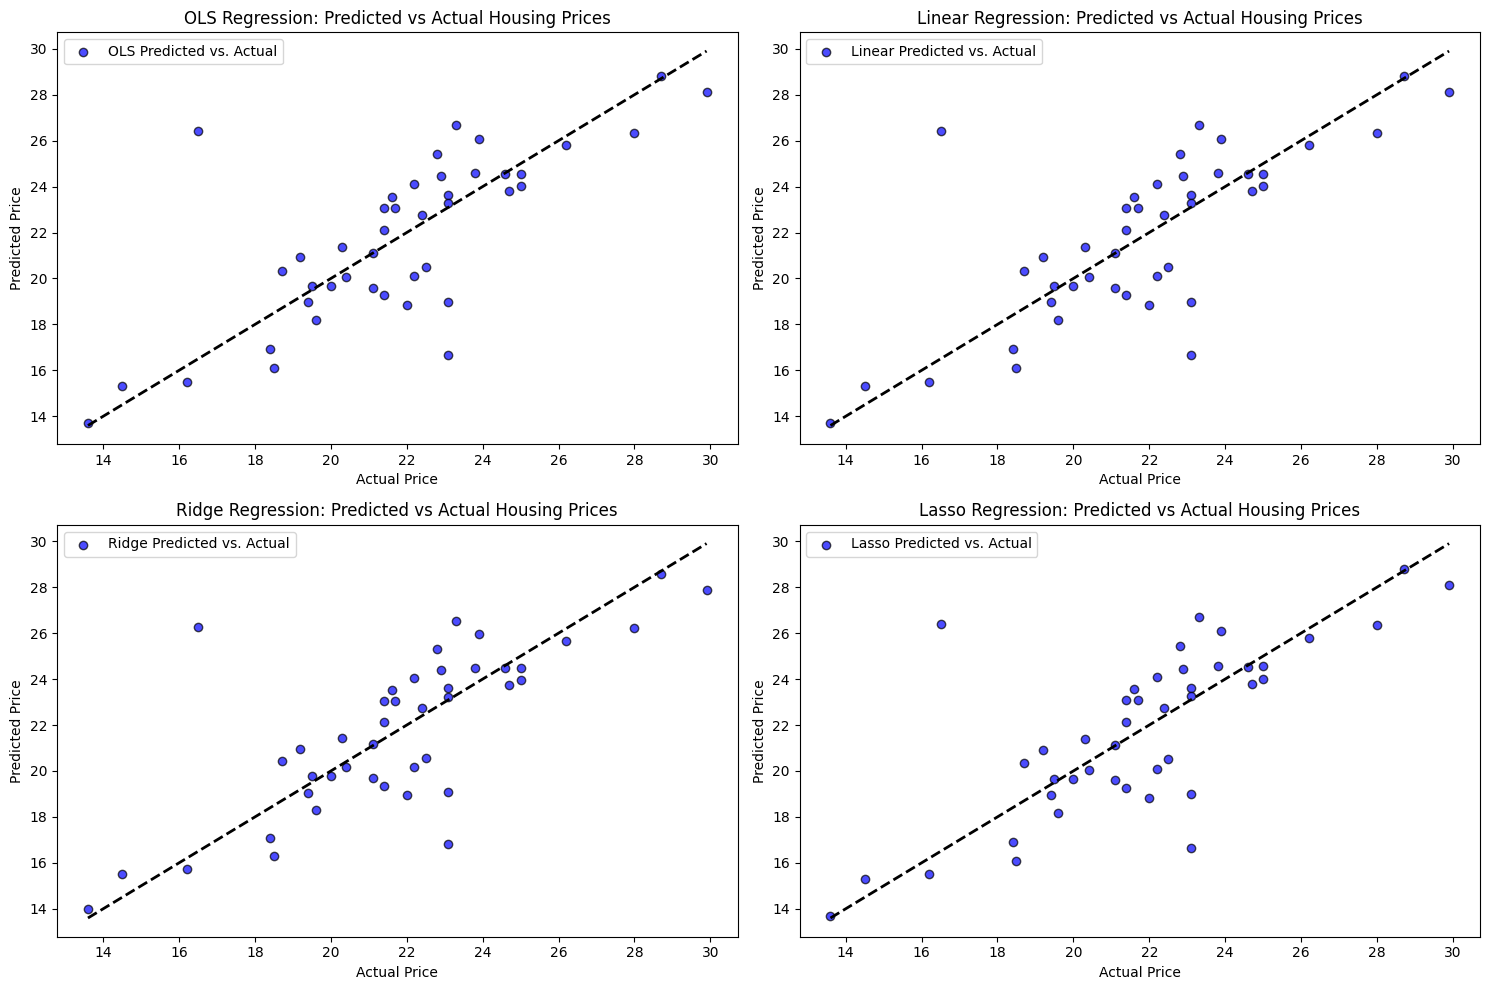

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


# 2. FISH DATASET

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import seaborn as sns


In [12]:
df = pd.read_csv("Fish.csv")
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [23]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [24]:
speices_value_counts = df.Species.value_counts()
speices_value_counts = pd.DataFrame(speices_value_counts)
speices_value_counts.T

Perch  Bream  Roach  Pike  Smelt  Parkki  Whitefish
Species     56     35     20    17     14      11          6

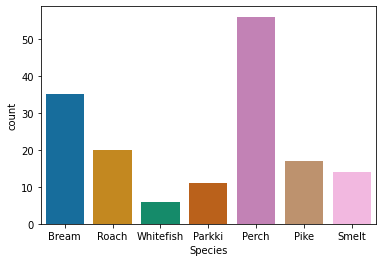

In [27]:
#barplot
ax = sns.countplot(x="Species", data=df, palette="colorblind")
plt.show()

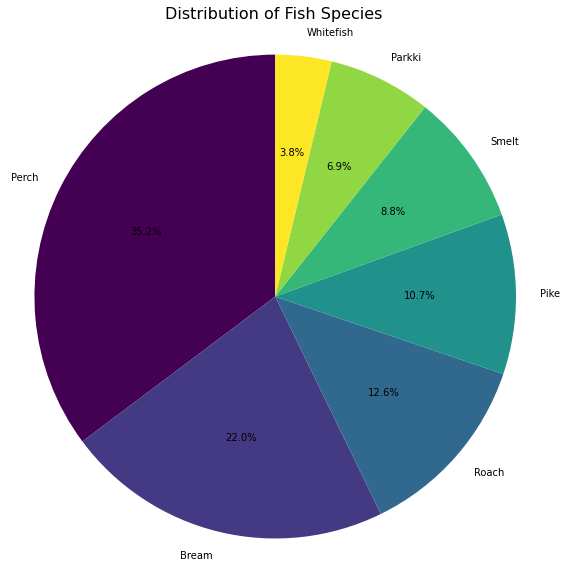

In [28]:
species_counts = df['Species'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.viridis(np.linspace(0, 1, len(species_counts))), startangle=90)
plt.title('Distribution of Fish Species', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

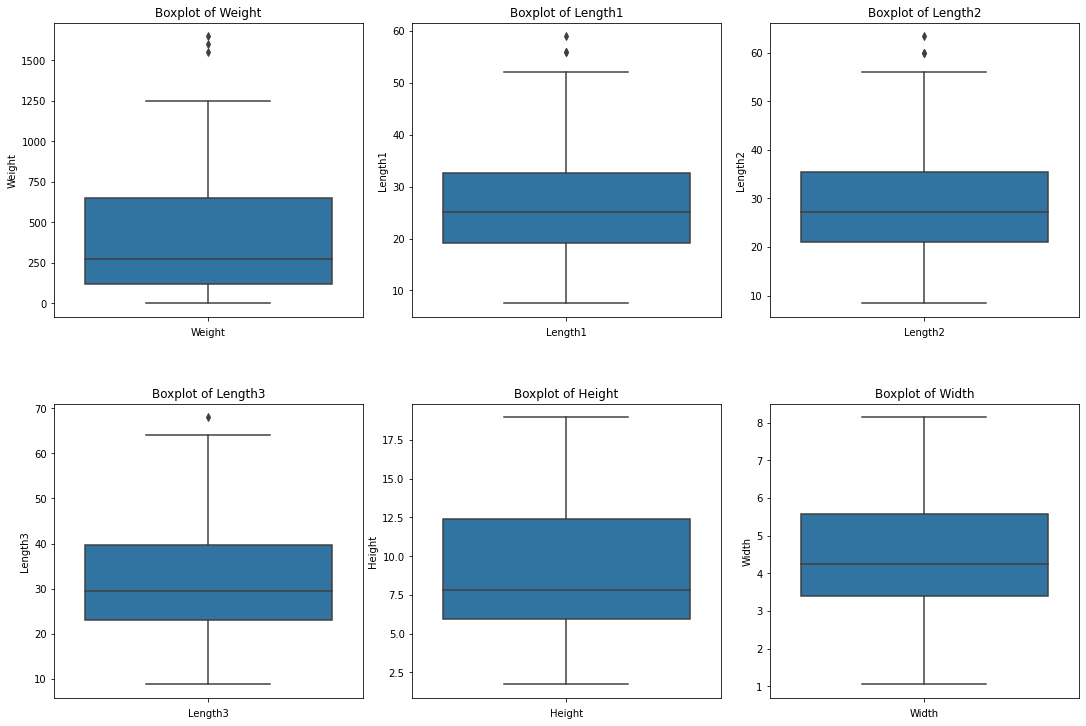

In [29]:
#Boxplot for all features
import math
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)    
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
index = 0
axs = axs.flatten()
for index, k in enumerate(numeric_columns):
    sns.boxplot(y=k, data=df, ax=axs[index])
    axs[index].set_title(f'Boxplot of {k}') 
    axs[index].set_xlabel(k)  

for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

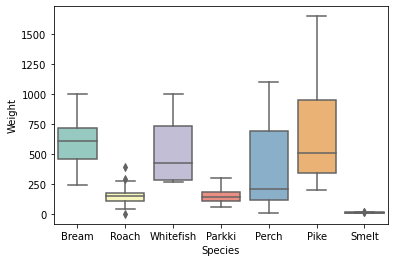

In [31]:
#BOX PLOT FOR SPECIES
ax = sns.boxplot(x="Species", y="Weight",data=df, palette="Set3")
plt.show()

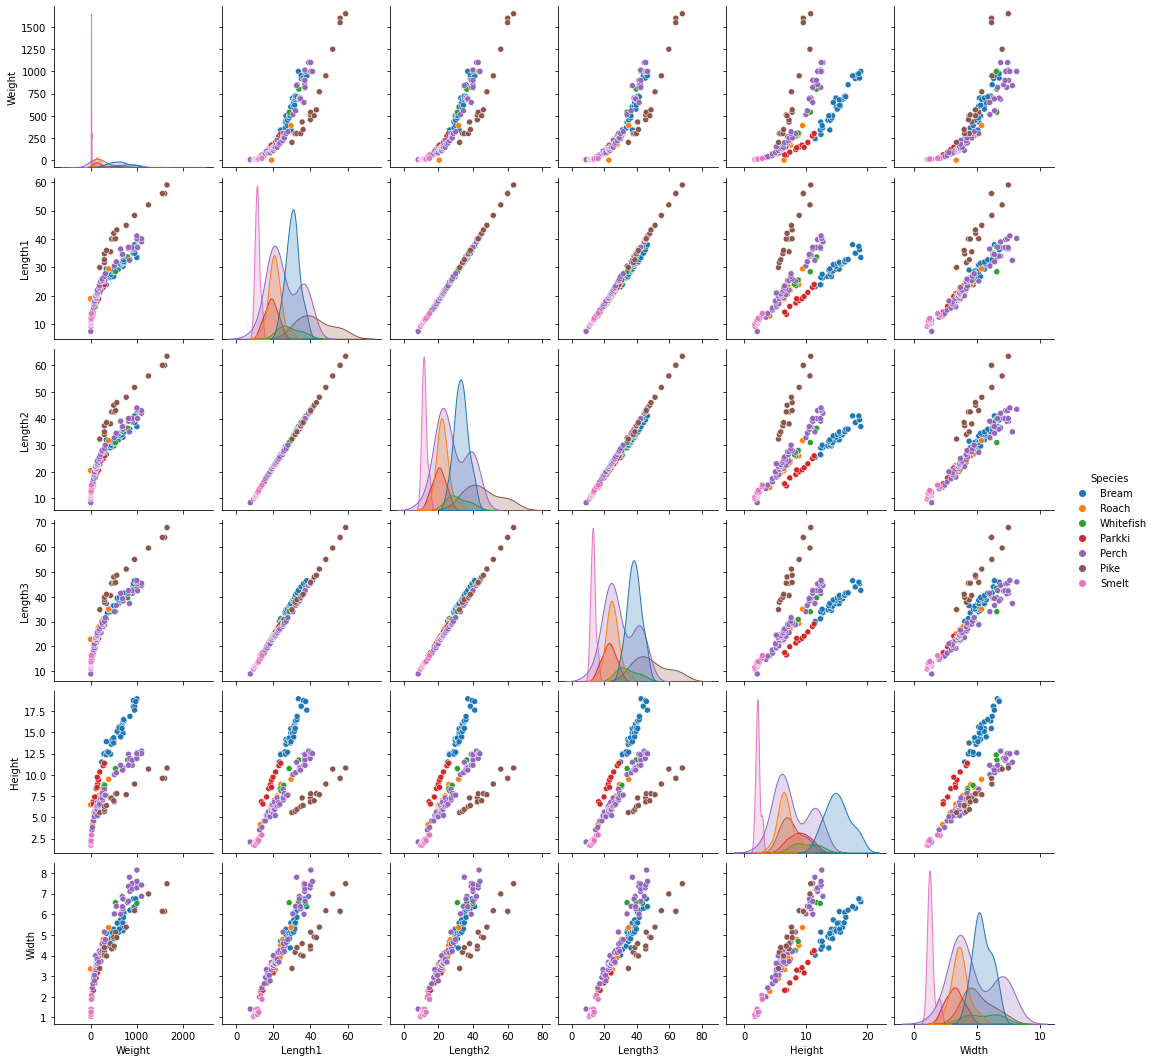

In [32]:
#PAIR PLOT OF SPECIES
g = sns.pairplot(df, kind='scatter', hue='Species');
plt.show()

Building Model WITHOUT OUTLIER REMOVAL AND WITHOUT FEATURE SCALING

In [13]:
X = df[['Length1', 'Length2', 'Length3', 'Height','Width']]
Y= df['Weight']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(127, 5)

In [34]:
y_train.shape

(127,)

In [35]:
X_test.shape

(32, 5)

In [36]:
y_test.shape

(32,)

In [38]:
X_train

Length1  Length2  Length3   Height   Width
75      15.0     16.2     17.2   4.5924  2.6316
138     43.2     46.0     48.7   7.7920  4.8700
2       23.9     26.5     31.1  12.3778  4.6961
86      20.0     22.0     23.5   6.1100  3.4075
45      20.5     22.5     25.3   7.0334  3.8203
..       ...      ...      ...      ...     ...
71      24.0     26.0     29.0  11.3680  4.2340
106     25.9     28.0     29.4   7.8204  4.2042
14      29.4     32.0     37.2  14.9544  5.1708
92      20.5     22.5     24.0   6.7920  3.6240
102     25.2     27.3     28.7   8.3230  5.1373

[127 rows x 5 columns]

In [39]:
y_train

75      51.5
138    567.0
2      340.0
86     120.0
45     160.0
       ...  
71     300.0
106    250.0
14     600.0
92     150.0
102    300.0
Name: Weight, Length: 127, dtype: float64

In [41]:
X_test.head()

Length1  Length2  Length3  Height   Width
78      16.8     18.7     19.4  5.1992  3.1234
155     11.7     12.4     13.5  2.4300  1.2690
128     30.0     32.3     34.8  5.5680  3.3756
55      23.6     26.0     28.7  8.3804  4.2476
94      21.0     23.0     24.5  5.2185  3.6260

In [43]:
y_test.head()

78      78.0
155     13.4
128    200.0
55     270.0
94     150.0
Name: Weight, dtype: float64

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1479.5199890816584, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124837.64166346879, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480905.75497209746, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descen

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8803
Ridge Regression MSE: 17022.0223
Lasso Regression R^2 score: 0.8774
Lasso Regression MSE: 17431.9637

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]

Ridge Regression Coefficients:
 [ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]

Lasso Regression Coefficients:
 [24.91762755  0.1063255  -0.         13.44083754 29.06666741]


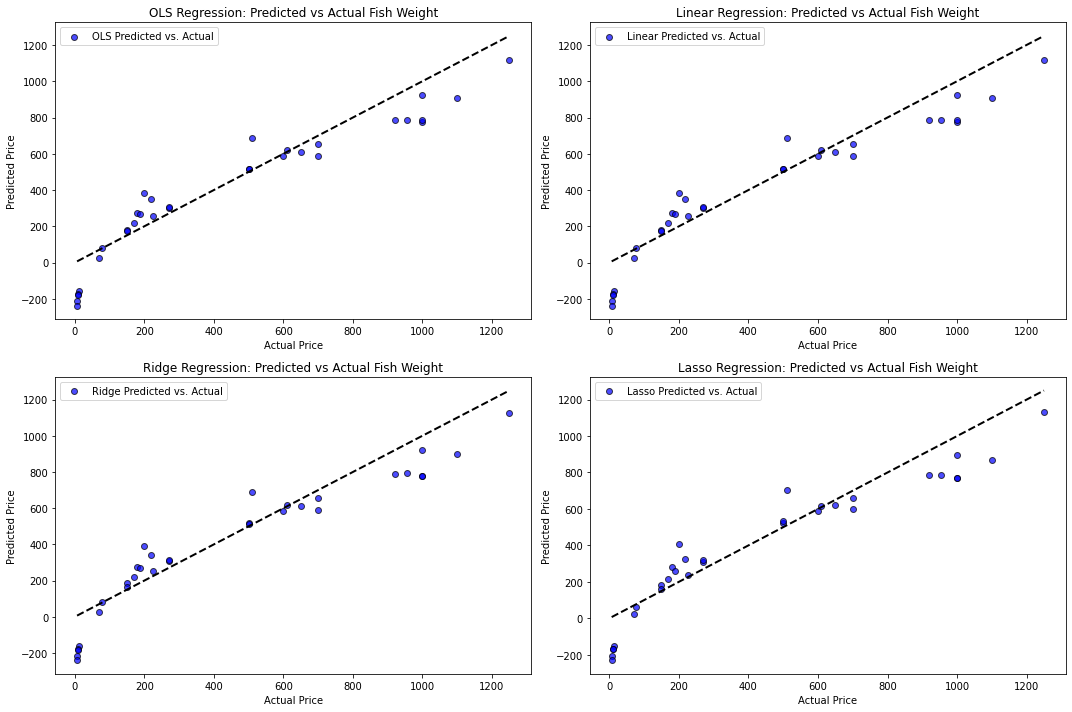

In [15]:
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()


BUILDING MODEL WITHOUT OUTLIER REMOVAL AND WITH FEATURE SCALING

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109155.20239408454, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491218.1014314948, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732567.1345518022, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753
Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regression Coefficients:
 [229.96344143   0.           0.          44.01533366  75.78051359]


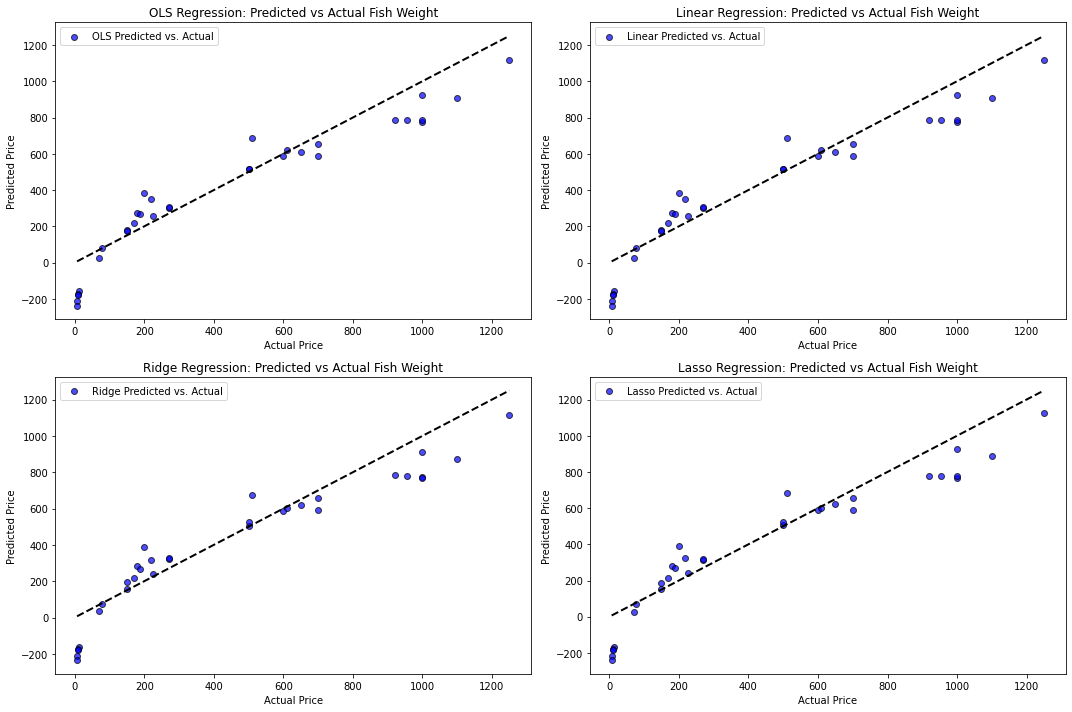

In [16]:


X = df[['Length1', 'Length2', 'Length3', 'Height','Width']]
y= df['Weight']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()


Now, OUTLIER REMOVAL

In [17]:
#outlier counts
for k, v in df.items():
    if df[k].dtype == 'object':
        continue 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")

Column 'Weight' has 3 outliers
Column 'Length1' has 3 outliers
Column 'Length2' has 3 outliers
Column 'Length3' has 1 outliers
Column 'Height' has 0 outliers
Column 'Width' has 0 outliers


In [18]:
#removal of outliers
def remove_outliers(df):
    new_df = df.copy()

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

    return new_df
cleaned_df = remove_outliers(df)
cleaned_df.head()


Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [19]:
#Checking again to make sure
for k, v in cleaned_df.items():
    if cleaned_df[k].dtype == 'object':
        continue 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")

Column 'Weight' has 0 outliers
Column 'Length1' has 0 outliers
Column 'Length2' has 0 outliers
Column 'Length3' has 0 outliers
Column 'Height' has 0 outliers
Column 'Width' has 0 outliers


### With Outlier removed and feature scaled

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168152.03118955088, tolerance: 902.8671261818182
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410096.11983482103, tolerance: 902.8671261818182
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459165.4350833168, tolerance: 902.8671261818182
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

OLS Regression R^2 score: 0.9129
OLS Regression MSE: 10023.9116
Linear Regression R^2 score: 0.9129
Linear Regression MSE: 10023.9116
Ridge Regression R^2 score: 0.9126
Ridge Regression MSE: 10061.1562
Lasso Regression R^2 score: 0.9136
Lasso Regression MSE: 9944.8446

OLS Regression Coefficients:
 const     -403.857178
Length1    125.349991
Length2    -61.771958
Length3    -42.305317
Height      39.098465
Width       49.889429
dtype: float64

Linear Regression Coefficients:
 [1093.85554688 -579.04353702 -432.74338172  161.26365093   82.48988391]

Ridge Regression Coefficients:
 [ 482.43207705  -42.92239053 -340.86478979  126.62869639   91.72050921]

Lasso Regression Coefficients:
 [ 825.74656851 -330.35405325 -406.72537894  148.61272539   85.10428061]


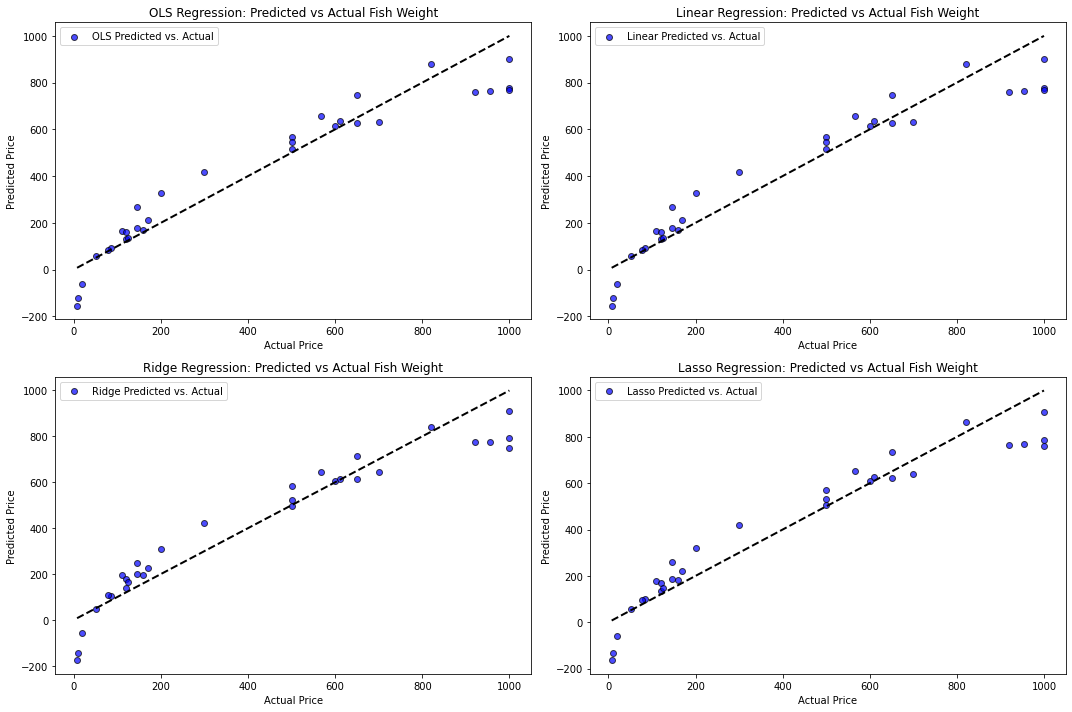

In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = cleaned_df[['Length1', 'Length2', 'Length3', 'Height','Width']]
y= cleaned_df['Weight']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()


#### NOT MUCH OUTLIERS SO NO NEED TO REMOVE AS IT DOESNT CHANGE MUCH VALUES HERE, WITH HEIGHT, WIDTH FEATURES 

In [55]:
X=df[['Height','Width']]
Y=df['Weight']

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1479.5199890816584, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124837.64166346879, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480905.75497209746, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descen

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8803
Ridge Regression MSE: 17022.0223
Lasso Regression R^2 score: 0.8774
Lasso Regression MSE: 17431.9637

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]

Ridge Regression Coefficients:
 [ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]

Lasso Regression Coefficients:
 [24.91762755  0.1063255  -0.         13.44083754 29.06666741]


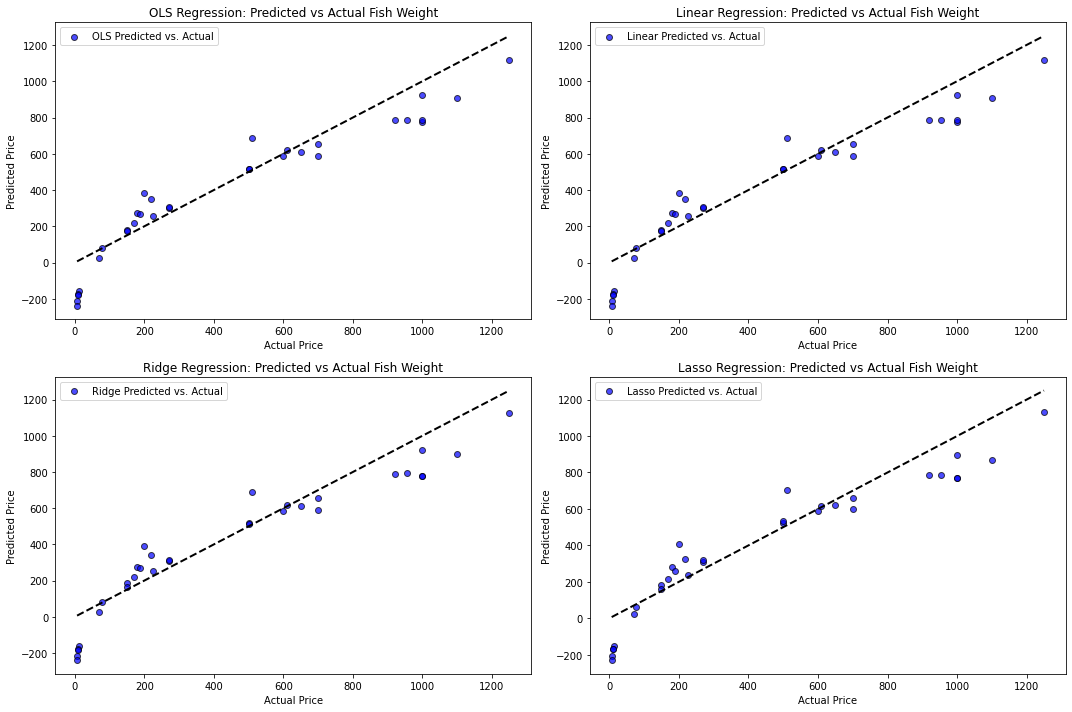

In [21]:
#without scaling

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109155.20239408454, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491218.1014314948, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732567.1345518022, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753
Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regression Coefficients:
 [229.96344143   0.           0.          44.01533366  75.78051359]


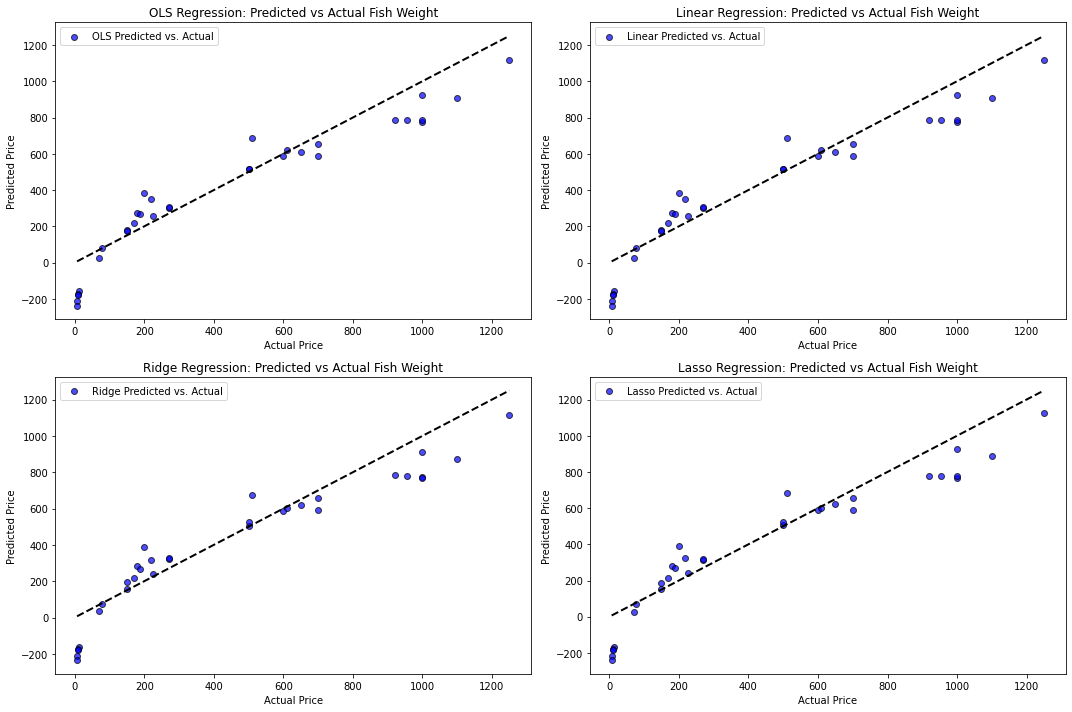

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Fish Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()
